# [0] [Total3D pickles] layout_emitter + 3D lighting

In [4]:
# borrowed from Total3D repo -> notebooks/parse_OR_labels-lighting-reindexed%2Bassigned-V4.ipynb
import sys
sys.path.insert(0, '/home/ruizhu/Documents/Projects/semanticInverse/train')

import os
import json

%reload_ext autoreload
%autoreload 2
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import matplotlib.pyplot as plt
%matplotlib widget

# dataset = 'sunrgbd'
dataset = 'OR'

mode = 'val'
# mode = 'train'
# mode = 'train-tmp'

# split_path_dict = {'sunrgbd': 'data/sunrgbd/preprocessed', 'OR': 'utils_OR/openrooms/preprocessed-full'}
split_path_dict = {'sunrgbd': 'data/sunrgbd/preprocessed', 'OR': '/home/ruizhu/Documents/Projects/semanticInverse/train/data/openrooms/list_OR_V4full/list'}

if dataset == 'sunrgbd':
    split_file = os.path.join(split_path_dict[dataset], mode + '.json')
    with open(split_file) as file:
        split = json.load(file)
elif dataset == 'OR':
    split_file = os.path.join(split_path_dict[dataset], mode + '.txt')
    with open(split_file) as f:
        mylist = f.read().splitlines() 
    split = [x.split(' ') for x in mylist]

# print(len(split), split[0])

import torch
import numpy as np
from pathlib import Path
from utils.utils_total3D.utils_OR_visualize import format_layout, Box
from utils.utils_total3D.data_config import OR4XCLASSES_dict, NYU40CLASSES
from utils.utils_total3D.utils_others import OR4X_mapping_catInt_to_RGB, OR4X_mapping_catStr_to_RGB
from utils.utils_total3D.utils_OR_vis_labels import read_vis_scene_3d, RGB_to_01
import pickle

OR = 'OR45'
classes = OR4XCLASSES_dict[OR] if dataset == 'OR' else NYU40CLASSES
with open(str(Path('../train/data/openrooms/total3D_colors/') / OR4X_mapping_catInt_to_RGB['light']), 'rb') as f:
    OR_mapping_catInt_to_RGB = pickle.load(f)[OR]
with open(str(Path('../train/data/openrooms/total3D_colors/') / OR4X_mapping_catStr_to_RGB['light']), 'rb') as f:
    OR_mapping_catStr_to_RGB = pickle.load(f)[OR]

import random
image_id = random.randint(0, len(split))
# image_id = 3
pickle_path_ori = split[image_id]

pickle_id = random.randint(0, len(split))
pickle_id = 8
naming = split[pickle_id][2]
naming = 'main_xml1/scene0001_00/im_1.hdr'

# naming = 'main_xml1/scene0552_00/im_1.hdr'
# naming = 'main_xml1/scene0552_00/im_1.hdr'
# naming = 'mainDiffLight_xml1/scene0017_02/im_4.hdr'
# naming = 'mainDiffMat_xml1/scene0695_03/im_26.hdr'
# pickle_path_ori = '/data/ruizhu/OR-V3-OR45_total3D_train_test_data/%06d.pkl'%pickle_id
meta_split = naming.split('/')[0]
scene_name = naming.split('/')[1]
withinsequence_id = int(naming.split('/')[2].split('.')[0].split('_')[1])
pickle_path_ori = '/data/ruizhu/OR-V4full-withMesh20210510-assign2NotReindex-OR45_total3D_train_test_data/%s/%s/%s'%(naming.split('/')[0], naming.split('/')[1], naming.split('/')[2].replace('im', 'layout_obj').replace('hdr', 'pkl'))

grid_size = 8

pickle_path = pickle_path_ori
# pickle_path = pickle_path_ori.replace('.pkl', '_reindexed.pkl')
pickle_emitters_path = pickle_path_ori.replace('.pkl', '_emitters.pkl')
pickle_emitters_assign_info_list_path = pickle_path_ori.replace('.pkl', '_emitters_assign_info_%dX%d_V4.pkl'%(grid_size, grid_size))

print(pickle_path)

/data/ruizhu/OR-V4full-withMesh20210510-assign2NotReindex-OR45_total3D_train_test_data/main_xml1/scene0001_00/layout_obj_1.pkl


In [5]:
print(sequence.keys())
print(sequence['layout'])

NameError: name 'sequence' is not defined

In [51]:
ORI_LAYOUT_BIN_WIDTH

0.7853981633974483

In [6]:
NUM_LAYOUT_ORI_BIN = 2
ORI_LAYOUT_BIN_WIDTH = np.pi / 4
layout_ori_bin = [[np.pi / 4 + i * ORI_LAYOUT_BIN_WIDTH, np.pi / 4 + (i + 1) * ORI_LAYOUT_BIN_WIDTH] for i in range(NUM_LAYOUT_ORI_BIN)]
layout_ori_bin

import sys
sys.path.insert(0, '/home/ruizhu/Documents/Projects/Total3DUnderstanding')
from libs.tools import ori_cls_reg
ori_cls, ori_reg = ori_cls_reg(sequence['layout']['basis'][0, :], layout_ori_bin)
print(ori_cls, ori_reg)

NameError: name 'sequence' is not defined

In [10]:
import pickle
with open(pickle_path, 'rb') as f:
    sequence = pickle.load(f)
print(sequence.keys())

with open(pickle_emitters_path, 'rb') as f:
    sequence_emitters = pickle.load(f)
print(sequence_emitters.keys(), sequence_emitters['sequence_name'], sequence_emitters['withinsequence_id'])
with open(pickle_emitters_assign_info_list_path, 'rb') as f:
    sequence_emitter2wall_assign_info_dict = pickle.load(f)
print(sequence_emitter2wall_assign_info_dict.keys())

import pickle5 as pickle
# emitter_representation_type = '0ambient'
emitter_representation_type = '3SG'
emitters_prop_dict_representation_dict_path = pickle_path.replace('layout_obj', ('emitters_prop_dict_%s'%emitter_representation_type)).replace('_reindexed', '')
with open(emitters_prop_dict_representation_dict_path, 'rb') as f:
    emitters_prop_dict_representation_dict = pickle.load(f)

# transform_to_total3d_coords_dict = {'transform_R': frame.transform_R, 'transform_t': frame.transform_t}
train_test_data_path = '/data/ruizhu/OR-V4full-withMesh20210510-assign2NotReindex-OR45_total3D_train_test_data'
transform_to_total3d_coords_dict_path = Path(train_test_data_path) / meta_split / scene_name / ('transform_to_total3d_coords_dict_%d.pkl'%withinsequence_id)
import pickle5 as pickle
with open(transform_to_total3d_coords_dict_path, 'rb') as f:
    transform_to_total3d_coords_dict = pickle.load(f)
    
RAW_data_path = '/newfoundland2/ruizhu/siggraphasia20dataset/layout_labels_V4full-withMesh20210507/'
emitter_dict_pickle_file = Path(RAW_data_path) / meta_split / scene_name / ('emitter_dict_%s_%d.pickle'%(emitter_representation_type, withinsequence_id))
with open(emitter_dict_pickle_file, "rb") as f:
    emitter_dict_RAW = pickle.load(f)


%matplotlib widget

gt_boxes_list = [format_layout(x) for x in sequence['boxes']['bdb3D']]
for x, class_id in zip(gt_boxes_list, sequence['boxes']['size_cls']):
    x.update({'class_id': class_id})
gt_boxes_dict = {}
for key in list(gt_boxes_list[0].keys()):
    gt_boxes_dict[key] = [x[key] for x in gt_boxes_list]
gt_boxes_dict['random_id'] = [x['random_id'] for x in sequence['boxes']['bdb2D_full']]
gt_boxes_dict['if_valid'] = [True]*sequence['boxes']['bdb2D_full'].shape[0]

    
gt_layout = sequence['layout']

from utils.utils_total3D.data_config import Dataset_Config
from utils.utils_total3D.utils_OR_layout import to_dict_tensor

from utils.utils_total3D.utils_OR_cam import get_rotation_matrix_gt

OR = 'OR45'
dataset_config = Dataset_Config(dataset, OR=OR, version='V3', paths={'total3D_lists_path': '../train/data/openrooms/list_OR_V4full', 'layout_emitter_path': '/data/ruizhu/OR-V4full-OR45_total3D_train_test_data'})
bins_tensor = to_dict_tensor(dataset_config.bins, if_cuda=False)
cam_R_gt = get_rotation_matrix_gt(bins_tensor,
                                  torch.zeros([1]).long()+sequence['camera']['pitch_cls'], torch.zeros([1])+sequence['camera']['pitch_reg'],
                                  torch.zeros([1]).long()+sequence['camera']['roll_cls'], torch.zeros([1])+sequence['camera']['roll_reg']).squeeze().numpy()

# ======== emitters_list
emitters_obj_list = []
for x in range(sequence_emitters['boxes']['bdb3D'].shape[0]):
    obj_dict_new = {'obj_box_3d': sequence_emitters['boxes']['bdb3D_emitter_part'][x], \
                    'random_id': sequence_emitters['boxes']['random_id'][x], \
                    'emitter_prop': sequence_emitters['boxes']['emitter_prop'][x], \
                    'bdb3D_emitter_part': sequence_emitters['boxes']['bdb3D_emitter_part'][x], \
                    'cat_id': sequence_emitters['boxes']['size_cls'][x], \
                    'cat_name': classes[sequence_emitters['boxes']['size_cls'][x]], 'cat_color': RGB_to_01(OR_mapping_catInt_to_RGB[sequence_emitters['boxes']['size_cls'][x]])}
    obj_random_id = sequence_emitters['boxes']['random_id'][x]
    emitter_prop_total3d = emitters_prop_dict_representation_dict[obj_random_id]['emitter_prop_total3d']
    if sequence_emitters['boxes']['emitter_prop'][x]['obj_type'] == 'window' and max(emitter_prop_total3d['intensity'])>1e-2:
        light_center_world_total3d = emitter_prop_total3d['light_center_world_total3d'].reshape(3, 1)
        light_axis_world_total3d = emitter_prop_total3d['light_axis_world_total3d'].reshape(3, 1)
    else:
        light_center_world_total3d = np.zeros((3, 1), dtype=np.float32)
        light_axis_world_total3d = np.zeros((3, 1), dtype=np.float32)
    obj_dict_new['light_world_total3d_centeraxis'] = [light_center_world_total3d, light_axis_world_total3d]
    
    obj_dict_new['emitter_prop'].update({'emitter_rgb_float': emitter_prop_total3d['intensity']})

    emitters_obj_list.append(obj_dict_new)
    
emitter2wall_assign_info_list = sequence_emitter2wall_assign_info_dict['emitter2wall_assign_info_list']
cell_info_grid_GT_includeempty = sequence_emitter2wall_assign_info_dict['cell_info_grid']
cell_info_grid_GT = []
for wall_idx in range(6):
    for i in range(grid_size):
        for j in range(grid_size):
            cell_info = cell_info_grid_GT_includeempty[wall_idx * grid_size**2 + i * grid_size + j]
            if cell_info['obj_type'] is None:
                continue
            cell_info['wallidx_i_j'] = (wall_idx, i, j)
            cell_info_grid_GT.append(cell_info)
                
            obj_random_id = cell_info['emitter_info']['random_id']
            emitter_prop_total3d = emitters_prop_dict_representation_dict[obj_random_id]['emitter_prop_total3d']


#             cell_intensity = np.array([emitter_prop_total3d['intensity_scale'] * x * 255. for x in emitter_prop_total3d['intensity_scaled']]) # intensity_scaled: [0., 1.]
            cell_intensity = np.array(emitter_prop_total3d['intensity'])
            cell_info['emitter_info']['intensity_scalelog'] = np.log(np.clip(np.linalg.norm(cell_intensity.flatten()) + 1., 1., np.inf))
            cell_info['emitter_info']['intensity'] = emitter_prop_total3d['intensity']
            # print(cell_intensity[wall_idx, i, j], cell_info['emitter_info']['intensity'])
#             cell_info['emitter_info']['intensity_scale'] = emitter_prop_total3d['intensity_scale']
#             cell_info['emitter_info']['intensity_scaled'] = emitter_prop_total3d['intensity_scaled']
            intensity_scale255 = max(cell_info['emitter_info']['intensity']) / 255.
            intensity_scaled01 = [np.clip(x / (intensity_scale255+1e-5) / 255., 0., 1.) for x in cell_info['emitter_info']['intensity']]
            cell_info['emitter_info']['intensity_scale255'] = intensity_scale255
            cell_info['emitter_info']['intensity_scaled01'] = intensity_scaled01


            # other representation-specific params
            if cell_info['obj_type'] == 'window':
                cell_info['emitter_info']['lamb'] = emitter_prop_total3d['lamb']
                cell_info['emitter_info']['light_dir_abs'] = emitter_prop_total3d['light_axis_world_total3d'].reshape(3,)
                if emitter_representation_type in ['1ambient']:
                    cell_info['emitter_info']['ambient'] = emitter_prop_total3d['ambient']
                if emitter_representation_type in ['2ambient']:
                    cell_info['emitter_info']['ambientL'] = emitter_prop_total3d['ambientL']
                    cell_info['emitter_info']['ambientR'] = emitter_prop_total3d['ambientR']



plt.figure(figsize=(15, 8))
ax_2d = plt.gca()

grid_prob = sequence_emitter2wall_assign_info_dict['wall_grid_prob'].reshape(6, -1)
import imageio
rgb_img = imageio.imread(sequence['rgb_img_path'])

scene_box = Box(rgb_img, sequence['camera']['K'], cam_R_gt, None, gt_layout, None, gt_boxes_dict, None, None, None, dataset=dataset, OR='OR45', \
                emitters_obj_list_gt=emitters_obj_list, emitter2wall_assign_info_list_gt=emitter2wall_assign_info_list, \
                emitter_cls_prob_PRED=np.random.random((6, grid_size**2)), emitter_cls_prob_GT=grid_prob, cell_info_grid_GT=cell_info_grid_GT, grid_size=grid_size, \
                paths={'color_file': '../train/data/openrooms/total3D_colors/OR4X_mapping_catInt_to_RGB_light.pkl'})
if_use_plt=True
img_map, _ = scene_box.draw_projected_layout('GT', return_plt=True, if_save=False, save_path='', if_use_plt=if_use_plt, fig_or_ax=ax_2d)
# img_map2 = scene_box.draw_projected_bdb3d('GT', return_plt=True, if_save=False, save_path='', if_use_plt=if_use_plt, fig_or_ax=ax_2d)
# plt.show()

a = scene_box.draw_3D_scene_plt('GT', if_show_objs=False, if_show_emitter=True, hide_cells=True, hide_random_id=False, fig_scale=0.5)
# a = scene_box.draw_3D_scene_plt_ori('GT', if_show_objs=True, hide_random_id=False, fig_scale=0.5)

# a[2][0].view_init(elev=-46, azim=86)

# %matplotlib widget
# sys.path.insert(0, '/home/ruizhu/Documents/Projects/semanticInverse/train/SimpleLayout')
# depth_combined, mask_conflict = scene_box.draw_projected_depth('GT', return_plt=True, if_save=False, save_path='', if_vis=True)


FileNotFoundError: [Errno 2] No such file or directory: '/data/ruizhu/OR-V4full-withMesh20210510-assign2NotReindex-OR45_total3D_train_test_data/main_xml1/scene0001_00/layout_obj_1.pkl'

# [0] envmap of windows
adapted from Total3D: **/notebooks/parse_OR_labels-lighting-reindexed%2Bassigned%2BenvmapReRender-V4_window-ImproveSG.ipynb**

In [8]:
import sys
sys.path.insert(0, '/home/ruizhu/Documents/Projects/Total3DUnderstanding')

from utils_OR.DatasetCreation import SGOptim
import torch
from pathlib import Path

RAW_path = '/newfoundland2/ruizhu/siggraphasia20dataset/code/Routine/DatasetCreation'
xml_path = '/newfoundland2/ruizhu/siggraphasia20dataset/code/Routine/scenes'
root_uv_mapped = Path('/newfoundland2/ruizhu/siggraphasia20dataset/uv_mapped')
envmap_root = '/newfoundland2/ruizhu/siggraphasia20dataset/EnvDataset/'

cam_dict = sequence['camera']['cam_dict']
cam_rotMat = cam_dict['cam_rotMat'] # world coordinates -> cam coordinates
transform_R, transform_t = transform_to_total3d_coords_dict['transform_R'], transform_to_total3d_coords_dict['transform_t']

emitters_windows = [x for x in emitters_obj_list if x['emitter_prop']['obj_type'] == 'window' and x['emitter_prop']['if_lit_up']]
window_random_ids = [x['random_id'] for x in emitters_windows]
print(window_random_ids)

random_id_chosen_idx = 0 # [!!!!!!!!!!!!!!!!] change this to choose among windows!
random_id_chosen = window_random_ids[random_id_chosen_idx]

emitter_window = emitters_windows[random_id_chosen_idx]

NameError: name 'sequence' is not defined

## old: 0ambient

In [9]:

# ==== read light dats [old-0ambient]
light_path = emitters_prop_dict_representation_dict[random_id_chosen]['emitter_prop']['light_path'].replace('3SG', '0ambient')
print(light_path)
# light_path = '/'.join(light_path.split('/')[:-1] + [light_path.split('/')[-1].replace('light', 'light0ambient')])
with open(light_path, 'rb') as f:
    light_dat = pickle.load(f)
print(light_path)
print(light_dat.keys(), light_dat['lamb'], light_dat['intensity'])

light_axis_rawWorld = light_dat['axis_RAW_world']
weight_SG = light_dat['intensity']
lamb_SG = light_dat['lamb']

light_axis_world_SG = np.array([light_axis_rawWorld[2], -light_axis_rawWorld[0], light_axis_rawWorld[1]])
cos_theta = light_axis_world_SG[2]
theta_SG = np.arccos(cos_theta) # [0, pi]
cos_phi = light_axis_world_SG[0] / np.sin(theta_SG)
sin_phi = light_axis_world_SG[1] / np.sin(theta_SG)
phi_SG = np.arctan2(sin_phi, cos_phi)
assert phi_SG >= -np.pi and phi_SG <= np.pi
ambient_SG = np.array([0., 0., 0.])

# print(theta_SG)
# print(phi_SG)
# print(lamb_SG)
# print(weight_SG)
# print(ambient_SG)

envOptim = SGOptim.SGEnvOptimSky(weightValue=np.zeros(3,), thetaValue=0., phiValue=0., ambientValue=np.zeros(3,), isCuda=True)
recImg = envOptim.renderSG(torch.tensor(theta_SG).reshape((1, 1, 1, 1, 1, 1)).cuda(), torch.tensor(phi_SG).reshape((1, 1, 1, 1, 1, 1)).cuda(), \
                  torch.tensor(lamb_SG).reshape((1, 1, 1, 1, 1)).cuda(), torch.tensor(weight_SG).reshape((1, 1, 3, 1, 1)).cuda(), \
                           ambient=torch.tensor(ambient_SG).reshape((1, 1, 3, 1, 1)).cuda())
recImg_gen = recImg.squeeze().cpu().numpy().transpose(1, 2, 0)

theta_SG_local = light_dat['theta_local']
phi_SG_local = light_dat['phi_local']

recImg_half = envOptim.renderSG(torch.tensor(theta_SG_local).reshape((1, 1, 1, 1, 1, 1)).cuda(), torch.tensor(phi_SG_local).reshape((1, 1, 1, 1, 1, 1)).cuda(), \
                  torch.tensor(lamb_SG).reshape((1, 1, 1, 1, 1)).cuda(), torch.tensor(weight_SG).reshape((1, 1, 3, 1, 1)).cuda(), \
                           ambient=torch.tensor(ambient_SG).reshape((1, 1, 3, 1, 1)).cuda())
recImg_gen_half = recImg_half.squeeze().cpu().numpy().transpose(1, 2, 0)

# recIm_local_uint8, _ = to_nonhdr(recIm.squeeze().transpose(1, 2, 0), scale=im_envmap_ori_scale)

NameError: name 'emitters_prop_dict_representation_dict' is not defined

/newfoundland2/ruizhu/siggraphasia20dataset/EnvDataset/2178L.hdr 75776.0
/newfoundland2/ruizhu/siggraphasia20dataset/code/Routine/scenes/xml/scene0055_01/main-light1_1.rgbe
/newfoundland2/ruizhu/siggraphasia20dataset/code/Routine/scenes/xml/scene0055_01/main-light1_1.rgbe 13.0


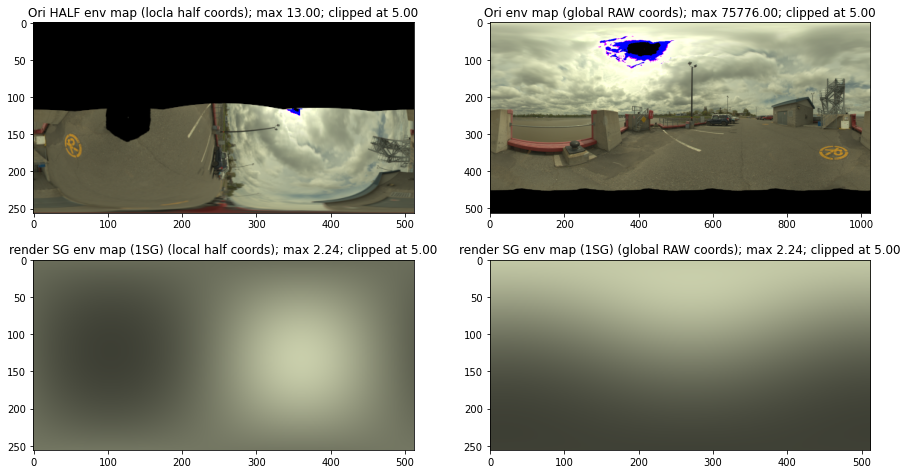

In [27]:
from utils_OR.utils_OR_imageops import loadHdr_simple, to_nonhdr
from pathlib import Path
import sys
sys.path.insert(0, '/home/ruizhu/Documents/Projects/Total3DUnderstanding/utils_OR')
from utils_OR.utils_OR_xml import get_XML_root, parse_XML_for_shapes
import random

%matplotlib inline

main_xml_file = Path(xml_path) / sequence['sub_name'] / sequence['scene_name'] / ('%s.xml'%sequence['meta_name'])
# main_xml_file = Path(str(main_xml_file).replace('DiffMat', ''))

root = get_XML_root(main_xml_file)
random_seed = random.randint(0, 10000)
shape_list, emitters_list = parse_XML_for_shapes(root, root_uv_mapped, if_return_emitters=True, random_seed=random_seed)
assert emitters_list[0]['emitter_prop']['if_env'] == True
envmap_path = emitters_list[0]['emitter_prop']['emitter_filename']
envmap_path = envmap_path.replace('../../../../../EnvDataset/', envmap_root)
envmap_scale = emitters_list[0]['emitter_prop']['emitter_scale']

im_envmap_ori = loadHdr_simple(envmap_path)

from utils_OR.utils_OR_imageops import loadHdr, loadImage, scaleHdr, load_OR_hdr_uint8

lightId = int(light_path.split('/')[-1].split('.')[0].split('-')[0].split('_')[-1])

img_path_halfenvmap = Path(xml_path) / sequence['sub_name'] / sequence['scene_name'] / \
('%s-light%d_1.rgbe' % (sequence['meta_name'].replace('mainDiffMat', 'main'), lightId ))
print(img_path_halfenvmap)

clip_thres = np.amax(recImg_gen)
clip_thres = 5

_, im_envmap_ori_scale = to_nonhdr(im_envmap_ori)
im_envmap_ori_clipped = np.copy(im_envmap_ori)
im_envmap_ori_clipped[im_envmap_ori_clipped>clip_thres] = 0.
im_envmap_ori_uint8, _ = to_nonhdr(im_envmap_ori_clipped, scale=im_envmap_ori_scale)

im_halfenvmap = loadHdr_simple(img_path_halfenvmap)
im_halfenvmap_clipped = np.copy(im_halfenvmap)
im_halfenvmap_clipped[im_halfenvmap_clipped>clip_thres] = 0.
im_halfenvmap_uint8, _ = to_nonhdr(im_halfenvmap_clipped, scale=im_envmap_ori_scale)

recImg_gen_uint8, _ = to_nonhdr(recImg_gen, scale=im_envmap_ori_scale)
recImg_gen_half_uint8, _ = to_nonhdr(recImg_gen_half, scale=im_envmap_ori_scale)

plt.figure(figsize=(15, 8))
ax = plt.subplot(221)
plt.imshow(im_halfenvmap_uint8)
ax.set_title('Ori HALF env map (locla half coords); max %.2f; clipped at %.2f'%(np.amax(im_halfenvmap), clip_thres))

ax = plt.subplot(222)
plt.imshow(im_envmap_ori_uint8)
ax.set_title('Ori env map (global RAW coords); max %.2f; clipped at %.2f'%(np.amax(im_envmap_ori), clip_thres))

ax = plt.subplot(223)
plt.imshow(recImg_gen_half_uint8)
ax.set_title('render SG env map (1SG) (local half coords); max %.2f; clipped at %.2f'%(np.amax(recImg_gen), clip_thres))

ax = plt.subplot(224)
plt.imshow(recImg_gen_uint8)
ax.set_title('render SG env map (1SG) (global RAW coords); max %.2f; clipped at %.2f'%(np.amax(recImg_gen), clip_thres))

plt.show()

In [168]:
light_dat

{'shapeId': 'window_3_object',
 'intensity': array([2.1167, 2.2447, 1.4881], dtype=float32),
 'envScale': 73.6576,
 'lamb': array([[[1.2968]]], dtype=float32),
 'axis_RAW_cam': array([-0.2785,  0.7633,  0.5831]),
 'axis_RAW_world': array([-0.0507,  0.9566,  0.2868]),
 'cam_rotMat_renderLight': array([[ 0.4633, -0.0009, -0.8864],
        [-0.471 ,  0.847 , -0.247 ],
        [ 0.7507,  0.5318,  0.3919]]),
 'theta_local': array(1.636, dtype=float32),
 'phi_local': array(1.2824, dtype=float32),
 'envAxis_x': array([ 0.0515, -0.    ,  0.9987]),
 'envAxis_y': array([-0.0003,  1.    ,  0.    ]),
 'envAxis_z': array([ 0.9987,  0.0003, -0.0515]),
 'lightXmlFile': '/newfoundland2/ruizhu/siggraphasia20dataset/code/Routine/scenes/xml/scene0055_01/main-lightSource_1.xml',
 'envMapPath': '../../../../../EnvDataset/2178L.hdr',
 'recHalfEnvName': '/newfoundland2/ruizhu/siggraphasia20dataset/code/Routine/scenes/xml/scene0055_01/main-light1_1rec0ambient.hdr',
 'imHalfEnvName': '/newfoundland2/ruizhu/sig

## new: 3SG

In [169]:
light_dat_3SG

{'shapeId': 'window_3_object',
 'envScale': 73.6576,
 'cam_rotMat_renderLight': array([[ 0.4633, -0.0009, -0.8864],
        [-0.471 ,  0.847 , -0.247 ],
        [ 0.7507,  0.5318,  0.3919]]),
 'envAxis_x': array([ 0.0515, -0.    ,  0.9987]),
 'envAxis_y': array([-0.0003,  1.    ,  0.    ]),
 'envAxis_z': array([ 0.9987,  0.0003, -0.0515]),
 'lightXmlFile': '/newfoundland2/ruizhu/siggraphasia20dataset/code/Routine/scenes/xml/scene0055_01/main-lightSource_1.xml',
 'envMapPath': '../../../../../EnvDataset/2178L.hdr',
 'recHalfEnvName': '',
 'imHalfEnvName': '/newfoundland2/ruizhu/siggraphasia20dataset/code/Routine/scenes/xml/scene0055_01/main-light1_1.rgbe',
 'axis_RAW_cam': array([-0.2736,  0.7591,  0.5907], dtype=float32),
 'axis_RAW_world': array([-0.0408,  0.9571,  0.2865]),
 'theta_local': 1.6260207951322267,
 'phi_local': 1.2823725529710261,
 'intensity': array([0.3537, 0.3824, 0.2758], dtype=float32),
 'lamb': array([6.3138], dtype=float32),
 'axis_RAW_camSky': array([-0.121 ,  0.8

In [7]:
%reload_ext autoreload
%autoreload 2
from utils_OR.DatasetCreation.SGOptimNew3SG import SGEnvRenderer3SG
envOptim3SG = SGEnvRenderer3SG()

light_path_3SG = emitters_prop_dict_representation_dict[random_id_chosen]['emitter_prop']['light_path']
with open(light_path_3SG, 'rb') as f:
    light_dat_3SG = pickle.load(f)

# if_global = False # set to True to match the RAW envmap; set to False to match the rendered half envmap

for if_global in [True, False]:
    envmap3SG = envOptim3SG.render3SG(light_dat_3SG, extra_scale=1., if_global=if_global)
    # envmap3SG = envOptim3SG.render3SG(light_dat_new_updated, extra_scale=light_dat['envScale'], if_global=if_global)
    recImg_gen_NEW = envmap3SG.squeeze(0).cpu().numpy().transpose(1, 2, 0)
    # envmap3SG_np = np.clip( / 255., 0., 1.)

    extra_scale = 1.
    plt.figure(figsize=(18, 5))
    # plt.imshow(envmap3SG_np)
    ax = plt.subplot(121)
    recImg_gen_NEW_uint8, _ = to_nonhdr(recImg_gen_NEW, scale=im_envmap_ori_scale*extra_scale)
    plt.imshow(recImg_gen_NEW_uint8)
    ax.set_title('render SG env map (NEW 3SG) (global RAW coords); max %.2f; extra scale %.2f'%(np.amax(recImg_gen_NEW), extra_scale))

    ax = plt.subplot(122)

    if if_global:
        im_envmap_ori_clipped = np.copy(im_envmap_ori)
        clip_thres = np.amax(recImg_gen_NEW)
#         clip_thres = 100000

        im_envmap_ori_clipped[im_envmap_ori_clipped>clip_thres] = 0.
        im_envmap_ori_clipped_uint8, _ = to_nonhdr(im_envmap_ori_clipped, scale=im_envmap_ori_scale*extra_scale)
        plt.imshow(im_envmap_ori_clipped_uint8)
        ax.set_title('Ori env map (global RAW coords); clipped at %.2f; max %.2f; extra scale %.2f'%(clip_thres, np.amax(im_envmap_ori_clipped), extra_scale))
    else:
        im_halfenvmap_clipped = np.copy(im_halfenvmap)
        clip_thres = np.amax(recImg_gen_NEW)
#         clip_thres = 100000

        im_halfenvmap_clipped[im_halfenvmap_clipped>clip_thres] = 0.
        im_halfenvmap_clipped_uint8, _ = to_nonhdr(im_halfenvmap_clipped, scale=im_envmap_ori_scale*extra_scale)
        plt.imshow(im_halfenvmap_clipped_uint8)
        ax.set_title('Half env map (local coords); clipped at %.2f; max %.2f; extra scale %.2f'%(clip_thres, np.amax(im_halfenvmap_clipped), extra_scale))


    plt.show()

NameError: name 'emitters_prop_dict_representation_dict' is not defined

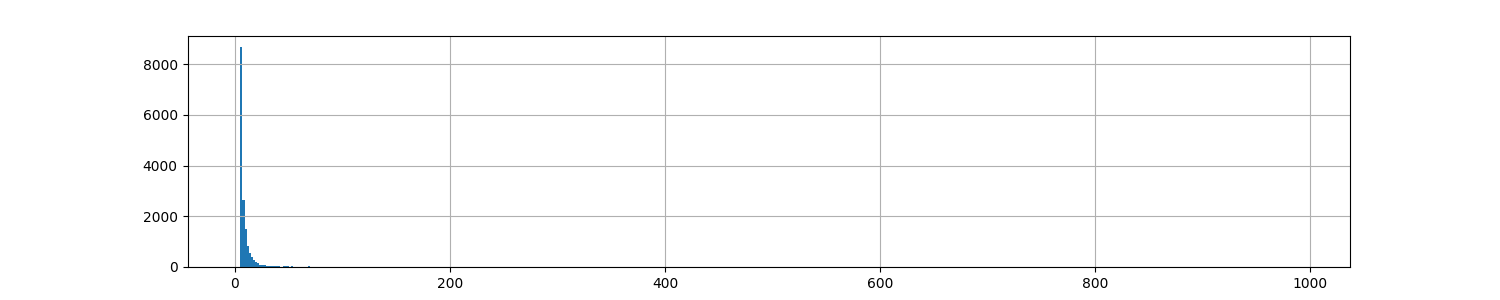

In [174]:
plt.figure(figsize=(15, 3))
# plt.imshow(envmap3SG_np)
ax = plt.subplot(111)
# recImg_gen_NEW_uint8, _ = to_nonhdr(recImg_gen_NEW, scale=im_envmap_ori_scale)
# plt.imshow(recImg_gen_NEW_uint8)
xx = im_envmap_ori.flatten()
xx = xx[xx>5]
xx = xx[xx<1000]
plt.hist(xx, 500)
plt.grid()

# ax.set_title('render SG env map (NEW 3SG) (global RAW coords); max %.2f'%np.amax(recImg_gen_NEW))

plt.show()

## Zhengqin's dat

In [28]:
LIGHT_PATH_NEW_ROOT = Path('/newfoundland2/ruizhu/siggraphasia20dataset/code/Routine/DatasetCreation/lightSrc_new_20211012_RE')
light_dat_new = LIGHT_PATH_NEW_ROOT / (sequence['meta_split'].replace('DiffMat', '')) / sequence['scene_name'] / ('light_%d'%withinsequence_id) / ('lightSrcNoOcclu%d.dat'%lightId)
print(light_dat_new)
with open(light_dat_new, 'rb') as fIn:
    light_dat_new = pickle.load(fIn) # {'intensity': array([380.588, 363.119, 391.177], dtype=float32), 'lamb': 0.0, 'axis': array([0., 1., 0.], dtype=float32)}

print(light_dat_new)

print(light_dat['envScale'], envmap_scale, main_xml_file)

/newfoundland2/ruizhu/siggraphasia20dataset/code/Routine/DatasetCreation/lightSrc_new_20211012_RE/main_xml/scene0055_01/light_16/lightSrcNoOcclu1.dat
{'intensity': array([26.0543, 28.1642, 20.3134], dtype=float32), 'axis': array([-0.2736,  0.7591,  0.5907], dtype=float32), 'lamb': array([6.3138], dtype=float32), 'intensitySky': array([13.0187, 14.5677, 10.3543], dtype=float32), 'axisSky': array([-0.121 ,  0.8961, -0.4271], dtype=float32), 'lambSky': array([1.2131], dtype=float32), 'intensityGrd': array([18.306 , 19.525 , 12.2452], dtype=float32), 'axisGrd': array([-0.6168,  0.6575, -0.4328], dtype=float32), 'lambGrd': array([0.9278], dtype=float32), 'loss': 0.09336910881102085, 'scale': 0.5087866108786611}
73.6576 73.6576 /newfoundland2/ruizhu/siggraphasia20dataset/code/Routine/scenes/xml/scene0055_01/mainDiffMat.xml


# [1] Visualize per-pixel lighting

In [60]:
%reload_ext autoreload
%autoreload 2
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import os.path as osp
import numpy as np
import cv2
from skimage.measure import block_reduce 

envHeight = 8
envWidth = 16
envRow = 120
envCol = 160
SGNum = 12

def loadEnvmap(envName ):
    print('>>>>loadEnvmap', envName)
    if not osp.isfile(envName ):
        env = np.zeros( [3, envRow, envCol,
            envHeight, envWidth], dtype = np.float32 )
        envInd = np.zeros([1, 1, 1], dtype=np.float32 )
        print('Warning: the envmap %s does not exist.' % envName )
        return env, envInd
    else:
        envHeightOrig, envWidthOrig = 16, 32
        assert( (envHeightOrig / envHeight) == (envWidthOrig / envWidth) )
        assert( envHeightOrig % envHeight == 0)

        env = cv2.imread(envName, -1 ) 
        print(env.shape)

        if not env is None:
            env = env.reshape(envRow, envHeightOrig, envCol,
                envWidthOrig, 3) # (1920, 5120, 3) -> (120, 16, 160, 32, 3)
            env = np.ascontiguousarray(env.transpose([4, 0, 2, 1, 3] ) ) # -> (3, 120, 160, 16, 32)

            scale = envHeightOrig / envHeight
            if scale > 1:
                env = block_reduce(env, block_size = (1, 1, 1, 2, 2), func = np.mean )

            envInd = np.ones([1, 1, 1], dtype=np.float32 )
            return env, envInd
        else:
            env = np.zeros( [3, envRow, envCol,
                envHeight, envWidth], dtype = np.float32 )
            envInd = np.zeros([1, 1, 1], dtype=np.float32 )
            print('Warning: the envmap %s does not exist.' % envName )
            return env, envInd

from pathlib import Path
# meta_split, scene_name, png_file_name = ('main_xml1', 'scene0552_00', 'im_1.png')
png_file_name = 'im_%d.png'%withinsequence_id
# meta_split, scene_name, png_file_name = ('mainDiffMat_xml1', 'scene0695_03', 'im_26.png')



root_path = Path('/newfoundland2/ruizhu/siggraphasia20dataset/code/Routine/DatasetCreation/')
env_path = root_path / meta_split / scene_name / (png_file_name.replace('im_', 'imenv_').replace('.png', '.hdr'))

# change to direct lighting; comment 3 lines to use original envmap lighting
# env_path = str(env_path).replace('imenv', 'imenvDirect')
# envRow = 120 // 4
# envCol = 160 // 4

envmaps, envmapsInd = loadEnvmap(str(env_path))


>>>>loadEnvmap /newfoundland2/ruizhu/siggraphasia20dataset/code/Routine/DatasetCreation/mainDiffLight_xml1/scene0509_00/imenv_1.hdr
(1920, 5120, 3)


(3, 12, 16, 8, 16)


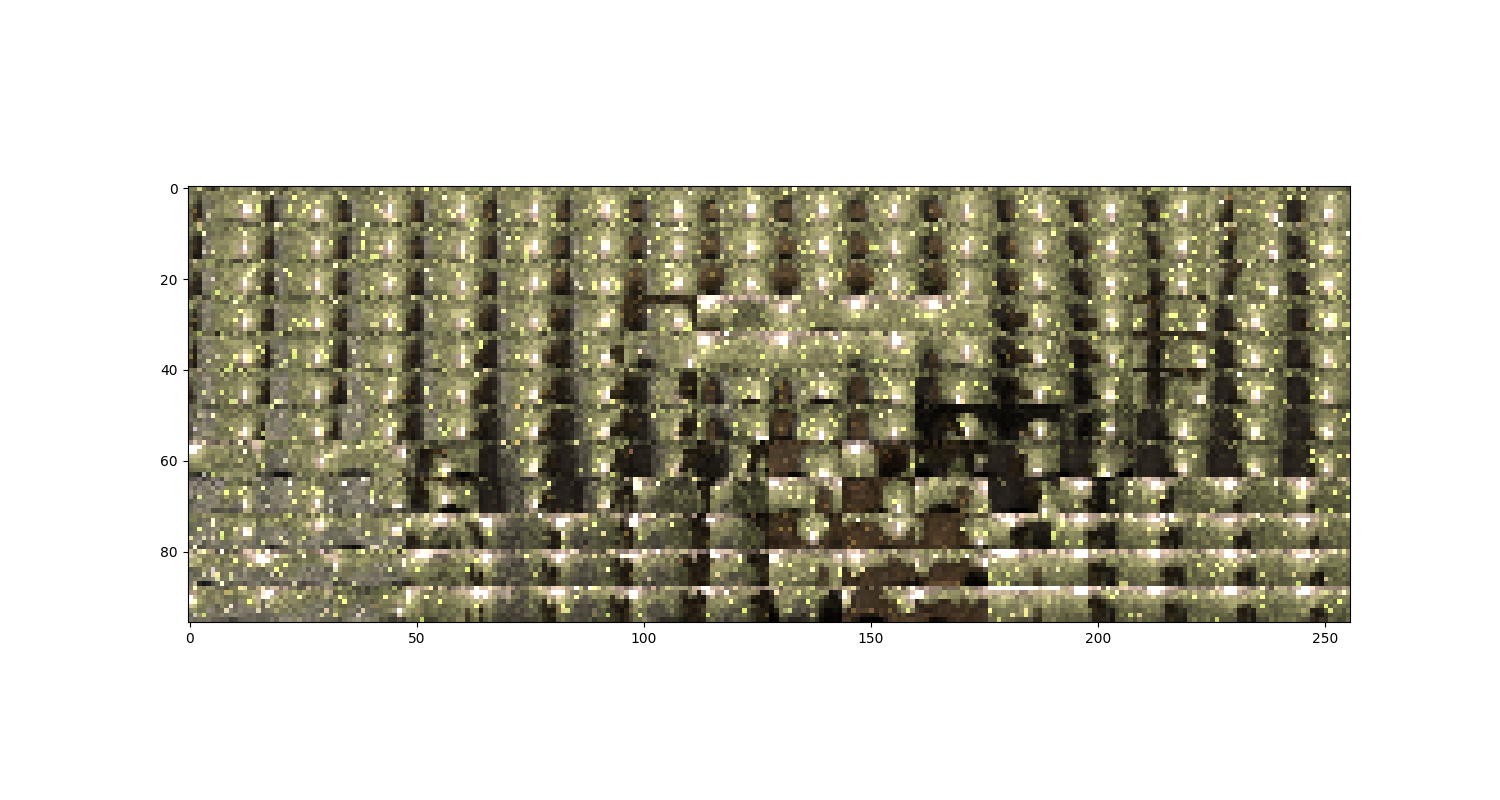

In [62]:
H_grid, W_grid, h, w = envmaps.shape[1:]
downsize_ratio = 10
assert H_grid % downsize_ratio == 0
assert W_grid % downsize_ratio == 0
xx, yy = np.meshgrid(np.arange(0, H_grid, downsize_ratio), np.arange(0, W_grid, downsize_ratio))
a = envmaps[:, xx.T, yy.T, :, :] * 0.05
a = np.clip(a**(1.0/2.2), 0., 1.)


print(a.shape)
b = a.transpose(1, 3, 2, 4, 0).reshape(H_grid*h//downsize_ratio, W_grid*w//downsize_ratio, 3)


import matplotlib.pyplot as plt
plt.figure(figsize=(15, 8))
plt.imshow(b)
plt.show()


## rendering layer

In [63]:
import numpy as np
from PIL import Image

im_width = 320
im_height = 240
bn = 1

def loadImage(imName, isGama = False):
    if not(osp.isfile(imName ) ):
#         self.logger.warning('File does not exist: ' + imName )
        assert(False )

    im = Image.open(imName)
    im = im.resize([im_width, im_height], Image.ANTIALIAS )

    im = np.asarray(im, dtype=np.float32)
    if isGama:
        im = (im / 255.0) ** 2.2
        im = 2 * im - 1
    else:
        im = (im - 127.5) / 127.5
    if len(im.shape) == 2:
        im = im[:, np.newaxis]
    im = np.transpose(im, [2, 0, 1] )

    return im

def loadHdr(imName):
    if not(osp.isfile(imName ) ):
#         print(imName )
        assert(False )
    im = cv2.imread(imName, -1)
    # print(imName, im.shape, im.dtype)

    if im is None:
        print(imName )
        assert(False )
    im = cv2.resize(im, (im_width, im_height), interpolation = cv2.INTER_AREA )
    im = np.transpose(im, [2, 0, 1])
    im = im[::-1, :, :]
    return im.transpose(1, 2, 0)

import struct
def loadBinary(imName, channels = 1, dtype=np.float32, if_resize=True):
    assert dtype in [np.float32, np.int32], 'Invalid binary type outside (np.float32, np.int32)!'
    if not(osp.isfile(imName ) ):
        assert(False ), '%s doesnt exist!'%imName
    with open(imName, 'rb') as fIn:
        hBuffer = fIn.read(4)
        height = struct.unpack('i', hBuffer)[0]
        wBuffer = fIn.read(4)
        width = struct.unpack('i', wBuffer)[0]
        dBuffer = fIn.read(4 * channels * width * height )
        if dtype == np.float32:
            decode_char = 'f'
        elif dtype == np.int32:
            decode_char = 'i'
        depth = np.asarray(struct.unpack(decode_char * channels * height * width, dBuffer), dtype=dtype)
        depth = depth.reshape([height, width, channels] )
        if if_resize:
            # print(self.im_width, self.im_height, width, height)
            if dtype == np.float32:
                depth = cv2.resize(depth, (im_width, im_height), interpolation=cv2.INTER_AREA )
            elif dtype == np.int32:
                depth = cv2.resize(depth.astype(np.float32), (im_width, im_height), interpolation=cv2.INTER_NEAREST)
                depth = depth.astype(np.int32)

        depth = np.squeeze(depth)

    return depth[np.newaxis, :, :]

import sys
sys.path.insert(0, '/home/ruizhu/Documents/Projects/semanticInverse/train')
import torch
from models_def.models_light import renderingLayer

# ===== adapted from forward_light(self, input_dict, return_dict_brdf)

root_path = Path('/newfoundland2/ruizhu/siggraphasia20dataset/code/Routine/DatasetCreation/')
env_path = root_path / meta_split / scene_name / (png_file_name.replace('im_', 'imenv_').replace('.png', '.hdr'))
# envmaps, envmapsInd = loadEnvmap(str(env_path)) # too long to load from hard disk
envmapsPredImage = torch.from_numpy(envmaps).cuda().unsqueeze(0)

albedo_path = root_path / meta_split / scene_name / (png_file_name.replace('im_', 'imbaseColor_'))
albedo = loadImage(str(albedo_path), isGama = False)
albedo = (0.5 * (albedo + 1) ) ** 2.2

albedoPred = torch.from_numpy(albedo).cuda().unsqueeze(0)

normal_path = str(root_path / meta_split / scene_name / png_file_name).replace('im_', 'imnormal_').replace('DiffLight', '')
# normalize the normal vector so that it will be unit length
normal = loadImage(str(normal_path) )
normal = normal / np.sqrt(np.maximum(np.sum(normal * normal, axis=0), 1e-5) )[np.newaxis, :]
normalPred = torch.from_numpy(normal).cuda().unsqueeze(0)

rough_path = root_path / meta_split / scene_name / (png_file_name.replace('im_', 'imroughness_'))
# Read roughness
rough = loadImage(str(rough_path) )[0:1, :, :]
roughPred = torch.from_numpy(rough).cuda().unsqueeze(0)



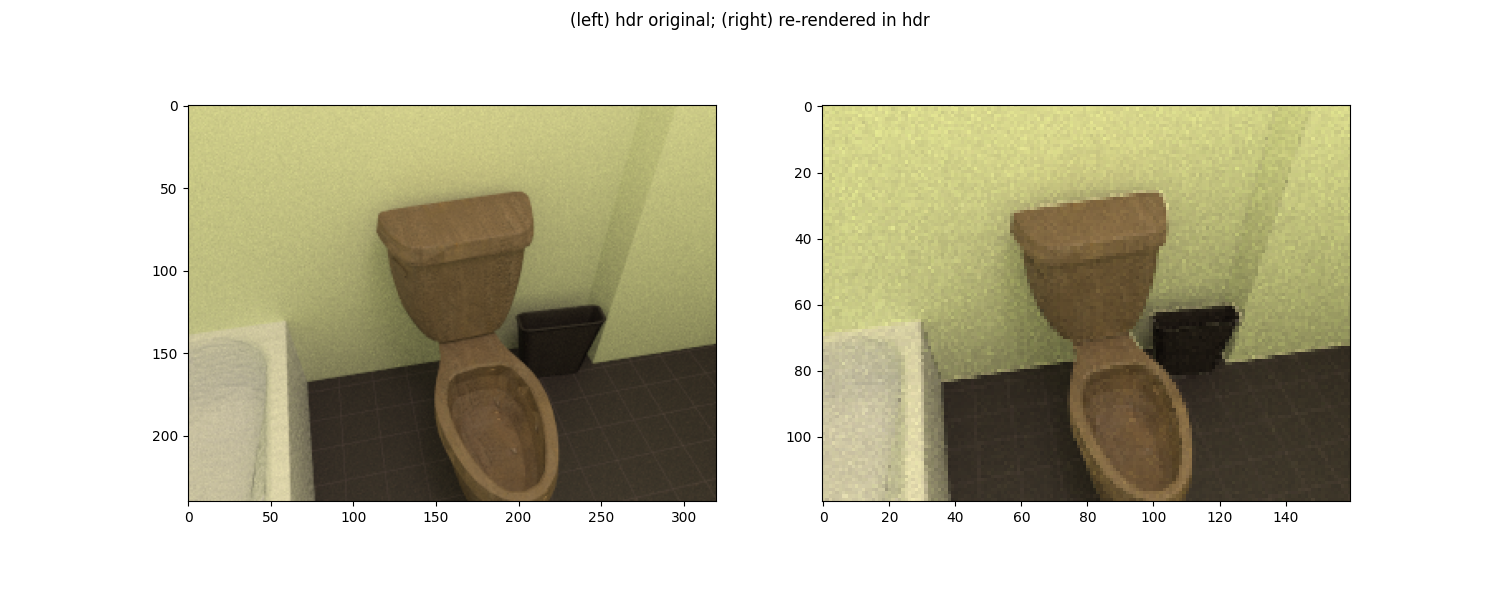

In [68]:
rL = renderingLayer(imWidth = envCol, imHeight = envRow)
diffusePred, specularPred = rL.forwardEnv(diffusePred=albedoPred.detach(), normalPred=normalPred, roughPred=roughPred, envmap=envmapsPredImage )
scale = 0.1
renderedImPred = torch.clamp(diffusePred * scale + specularPred * scale, 0, 1)
rendered_im = renderedImPred.cpu().squeeze().permute(1, 2, 0)

import matplotlib.pyplot as plt
hdr_path = root_path / meta_split / scene_name / (png_file_name.replace('.png', '.hdr'))
im = loadHdr(str(hdr_path))
im = im * 0.1

fig = plt.figure(figsize=(15, 6))
plt.subplot(121)
plt.imshow(np.clip((im**(1.0/2.2)), 0., 1.))
plt.subplot(122)
plt.imshow(np.clip((rendered_im**(1.0/2.2)), 0., 1.))

fig.suptitle('(left) hdr original; (right) re-rendered in hdr')

plt.show()

## visualize depth, normal

In [69]:
print(rL.ls.shape) # hemisphere dir vector for each pixel in envmap (local coords) (8x16)
print(rL.envWeight.shape) # solid angle weight for each pixel (8x16)
print(rL.v.shape) # virtual camera plane 3D coords (x-y-z with -z forward)

torch.Size([128, 3])
torch.Size([1, 128, 1, 1, 1])
torch.Size([1, 3, 120, 160])


In [70]:
depth_path = str(root_path / meta_split / scene_name / (png_file_name.replace('im_', 'imdepth_').replace('png', 'dat'))).replace('DiffLight', '').replace('DiffMat', '')
# Read depth
depth = loadBinary(depth_path).squeeze()

f = 577.8708 / 2.
u0 = im_width / 2.
v0 = im_height / 2.

uu, vv = np.meshgrid(range(im_width), range(im_height))
z = -depth
x = - (uu - u0) / f * z
y = (vv - v0) / f * z
points = np.stack([x.squeeze(), y.squeeze(), z.squeeze()])

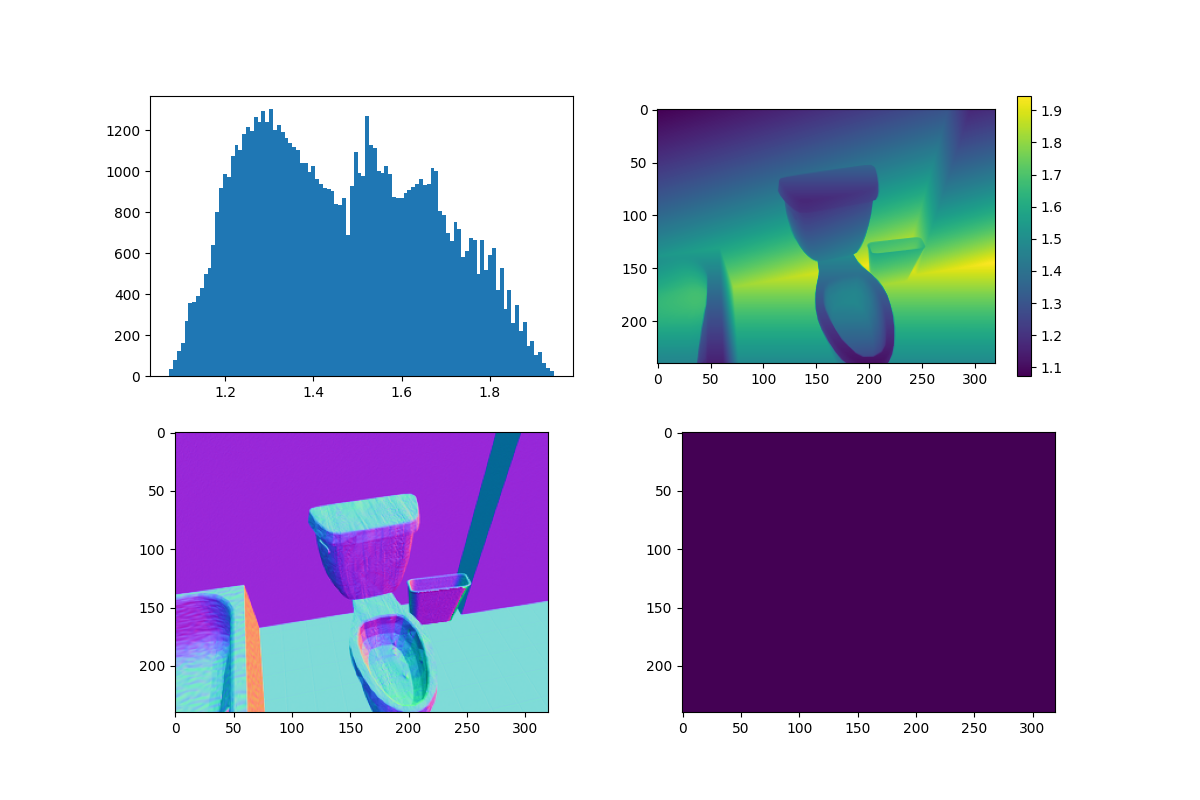

In [71]:
plt.figure(figsize=(12, 8))
plt.subplot(221)
plt.hist(depth.reshape(-1), 100)
plt.subplot(222)
plt.imshow(depth)
plt.colorbar()
plt.subplot(224)
mask = depth > 0.1
plt.imshow(mask)
plt.subplot(223)
normal_vis = normal.transpose(1, 2, 0)
normal_vis = (normal_vis + 1.)/2.
plt.imshow(normal_vis)
plt.show()

## visualize 3D geometry (LightNet)

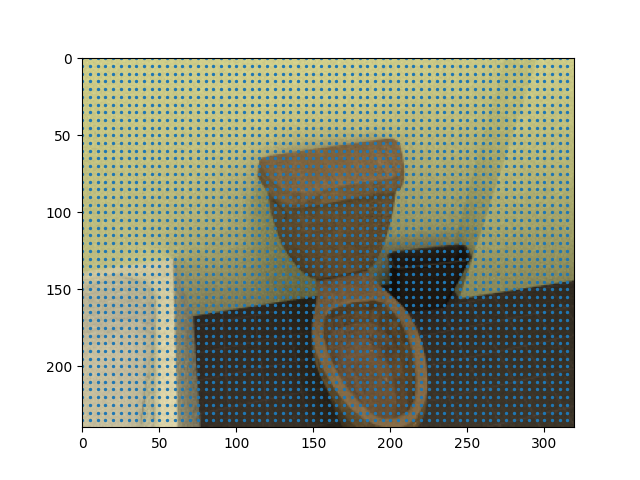

In [77]:
plt.figure()
plt.imshow(np.clip((im**(1.0/2.2)), 0., 1.))
plt.scatter(uu_subsample, vv_subsample, s=2)
plt.show()

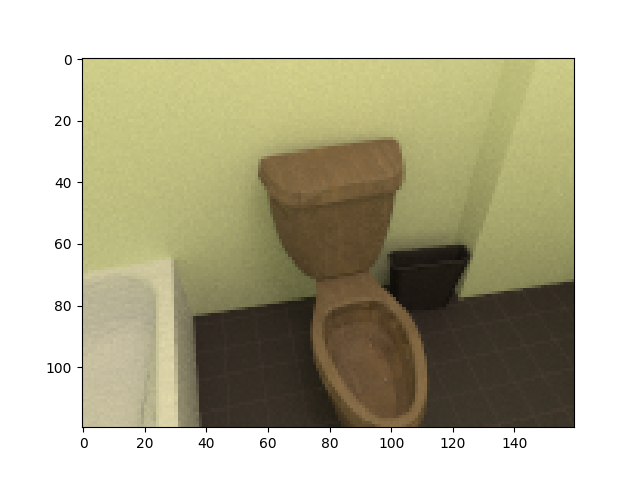

/tmp/ipykernel_29749/1662204795.py:19: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax_3d = fig.gca(projection='3d')


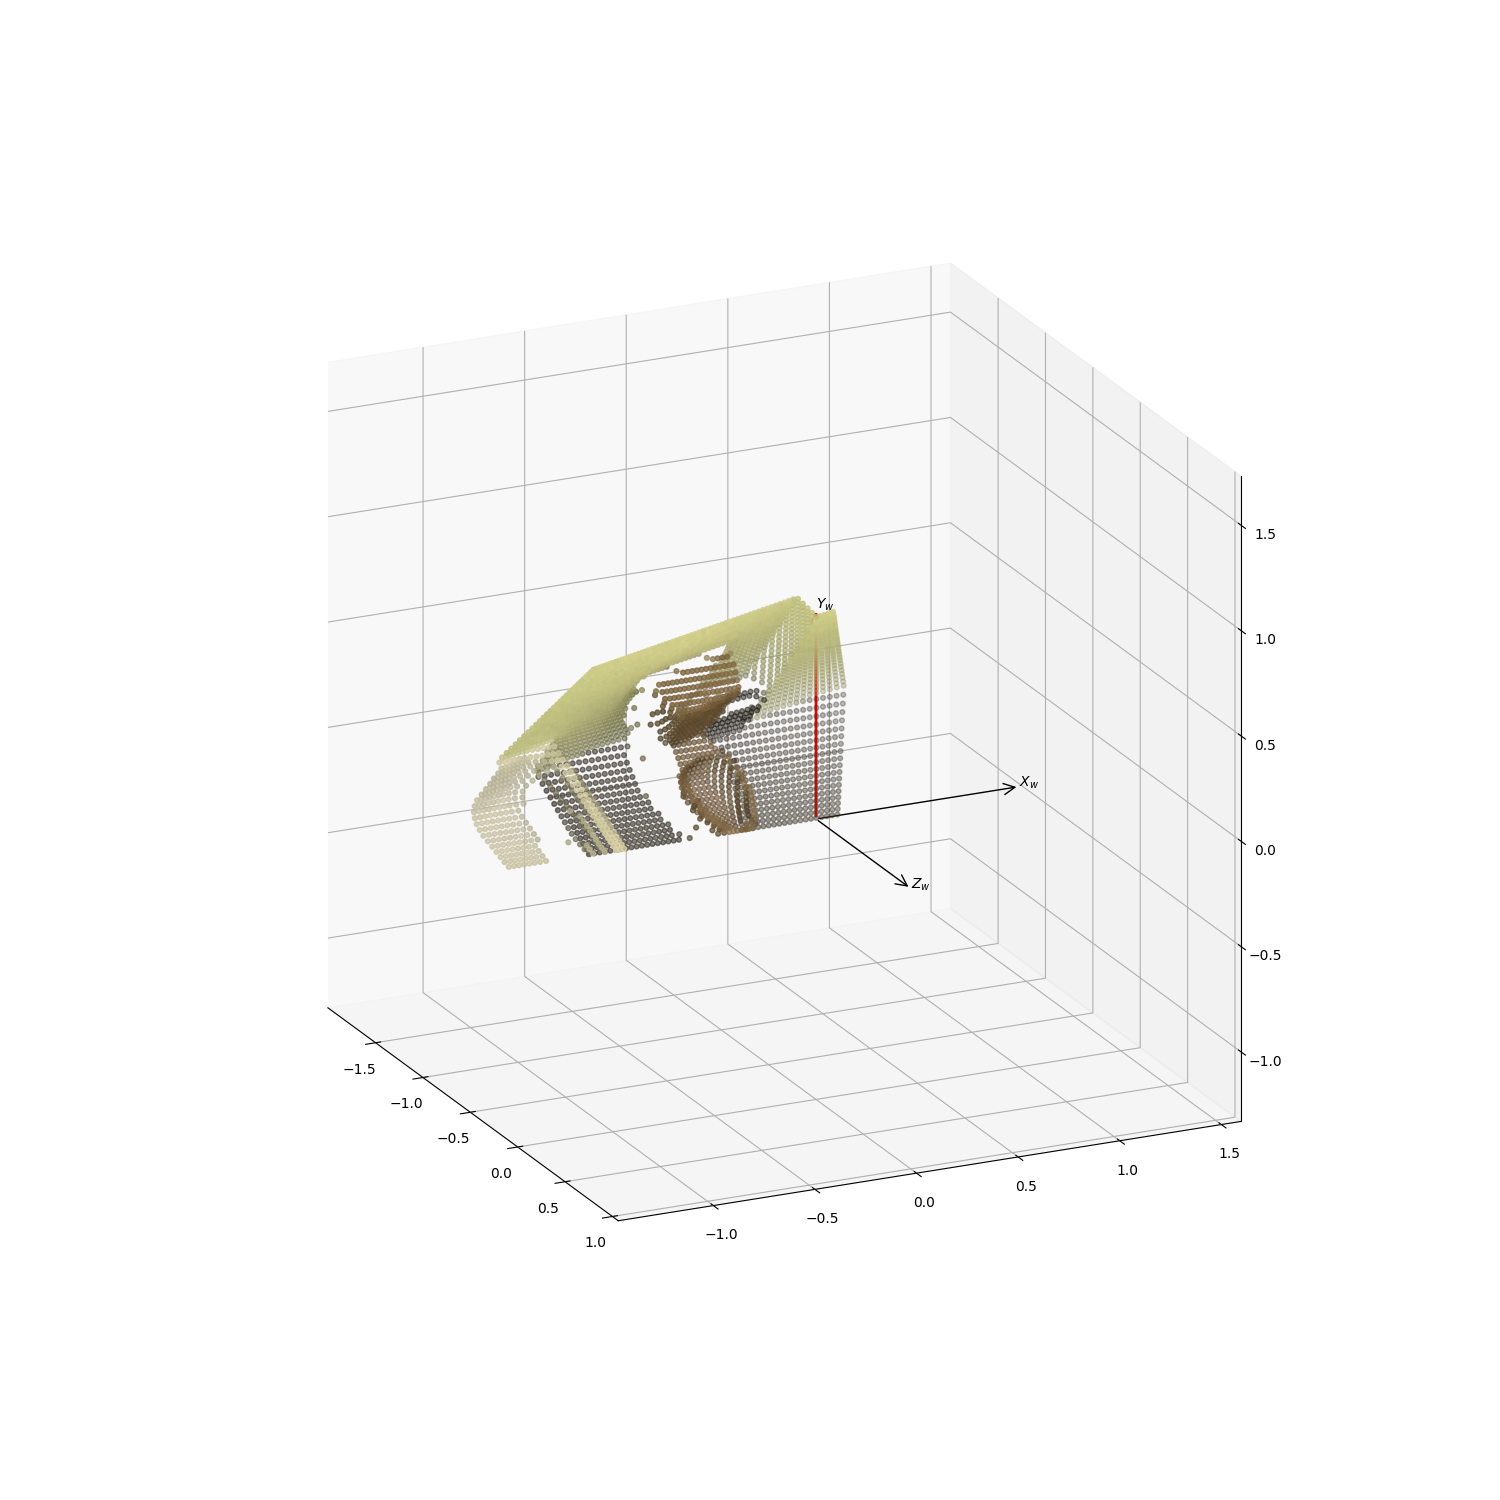

In [84]:
sys.path.insert(0, '/home/ruizhu/Documents/Projects/semanticInverse/SimpleLayout')
from SimpleLayout.utils_SL_vis import vis_cube_plt, set_axes_equal, vis_axis, vis_axis_xyz, vis_index_map

uu_subsample, vv_subsample = np.meshgrid(np.arange(0, im_width-1, 5), np.arange(0, im_height-1, 5))
points_subsample = points[:, vv_subsample, uu_subsample].reshape(3, -1)
# colors = points_subsample[2, :]
# colors[colors>-1.]=-1.
im_resized = cv2.resize(im, (envCol, envRow), interpolation=cv2.INTER_AREA )
im_resized = np.clip(im_resized**(1.0/2.2), 0., 1.)
plt.figure()
plt.imshow(im_resized)
plt.show()
lightnet_downsample_ratio = im_height//im_resized.shape[0]
assert lightnet_downsample_ratio == im_width//im_resized.shape[1]

%matplotlib widget
fig = plt.figure(figsize=(15, 15))
ax_3d = fig.add_subplot(111, projection='3d')
ax_3d = fig.gca(projection='3d')
ax_3d.set_proj_type('ortho')
ax_3d.set_aspect("auto")

colors = im_resized[vv_subsample//lightnet_downsample_ratio, uu_subsample//lightnet_downsample_ratio, :].reshape(-1, 3)
valid_points = points_subsample[2, :] < -0.05
p = ax_3d.scatter(points_subsample[2, valid_points], points_subsample[0, valid_points], points_subsample[1, valid_points], s=12., c=colors[valid_points], cmap='jet')
# plt.colorbar(p)

vis_axis(ax_3d, make_bold=[2], tags=[r'$Z_w$', r'$X_w$', r'$Y_w$'])
# ax_3d.view_init(elev=143, azim=-63)
ax_3d.set_box_aspect([1,1,1])
xyz_min = np.amin(points_subsample, 1)
xyz_max = np.amax(points_subsample, 1)
origin = np.array([0, 0, 0])
xyz_min = np.minimum(xyz_min, origin.reshape((3,)))
xyz_max = np.maximum(xyz_max, origin.reshape((3,))+1.)

new_limits = np.hstack([xyz_min.reshape((3, 1)), xyz_max.reshape((3, 1))])
set_axes_equal(ax_3d, limits=new_limits[[2, 0, 1], :]) # IMPORTANT - this is also required
# ax_3d.axes.set_xlim3d(left=new_limits[2][0], right=new_limits[2][1])
# ax_3d.axes.set_ylim3d(bottom=new_limits[0][0], top=new_limits[0][1]) 
# ax_3d.axes.set_zlim3d(bottom=new_limits[1][0], top=new_limits[1][1])

# set_axes_equal(ax_3d) # IMPORTANT - this is also required


ax_3d.view_init(elev=20, azim=-25)
# ax_3d.view_init(elev=0, azim=0)


In [78]:
xyz_min, xyz_max

(array([-0.9139, -0.5981, -1.9415]), array([1.0415, 1.    , 1.    ]))

## parallize acquisition of cell params

In [158]:
# torch
basis_v_indexes = [(3, 2, 0), (7, 4, 6), (4, 0, 5), (6, 5, 2), (7, 6, 3), (7, 3, 4)]

layout_cuda = torch.from_numpy(gt_layout).cuda()
origin_v1_v2_list = [basis_v_indexes[wall_idx] for wall_idx in range(6)]
basis_1_list = [(layout_cuda[origin_v1_v2[1]] - layout_cuda[origin_v1_v2[0]]) / grid_size for origin_v1_v2 in origin_v1_v2_list]
basis_2_list = [(layout_cuda[origin_v1_v2[2]] - layout_cuda[origin_v1_v2[0]]) / grid_size for origin_v1_v2 in origin_v1_v2_list]
origin_0_list = [layout_cuda[origin_v1_v2[0]] for origin_v1_v2 in origin_v1_v2_list]

basis_1_array = torch.stack(basis_1_list).unsqueeze(1).unsqueeze(1).float() # torch.Size([6, 1, 1, 3])
basis_2_array = torch.stack(basis_2_list).unsqueeze(1).unsqueeze(1).float()
origin_0_array = torch.stack(origin_0_list).unsqueeze(1).unsqueeze(1).float()

ii, jj = torch.meshgrid(torch.arange(grid_size), torch.arange(grid_size))
ii, jj = ii.cuda().unsqueeze(0).unsqueeze(-1).float(), jj.cuda().unsqueeze(0).unsqueeze(-1).float()
x_ij = basis_1_array * ii + basis_2_array * jj + origin_0_array
x_i1j = basis_1_array * (ii+1.) + basis_2_array * jj + origin_0_array
x_i1j1 = basis_1_array * (ii+1.) + basis_2_array * (jj+1.) + origin_0_array
x_ij1 = basis_1_array * ii + basis_2_array * (jj+1.)+ origin_0_array
verts_all = torch.stack([x_ij, x_i1j, x_i1j1, x_ij1], -1).transpose(-1, -2) # torch.Size([6, 8, 8, 4, 3])
verts_flattened = verts_all.reshape(-1, 4, 3).transpose(-1, -2) # torch.Size([?, 3, 4])

extra_transform_matrix = torch.tensor([[0., 0., 1.], [0., -1., 0.], [1., 0., 0.]]).unsqueeze(0).cuda().float()
cam_R_transform, cam_t_transform = torch.from_numpy(cam_R_gt.T).cuda().float().unsqueeze(0), torch.zeros((1, 3, 1)).cuda().float()
nverts = verts_flattened.shape[0]
x1x2_transformed = cam_R_transform.expand(nverts, -1, -1) @ verts_flattened + cam_t_transform
x1x2_transformed = x1x2_transformed.transpose(-1, -2) @ extra_transform_matrix.expand(nverts, -1, -1) # camera projection coords: z forward, x right, y down
extra_transform_matrix_LightNet = torch.tensor([[1., 0., 0.], [0., -1., 0.], [0., 0., -1.]]).unsqueeze(0).cuda().float()
x1x2_transformed_LightNet = x1x2_transformed @ extra_transform_matrix_LightNet.expand(nverts, -1, -1) # LightNet coords: z backward, x right, y up # [1536, 1, 3]

verts_transformed_LightNet = torch.squeeze(x1x2_transformed_LightNet, 1).reshape(6, grid_size, grid_size, 4, 3)
verts_transformed_LightNet_np = verts_transformed_LightNet.cpu().detach().numpy()
verts_center_transformed_LightNet = torch.mean(verts_transformed_LightNet, 3) # torch.Size([6, 8, 8, 3])

verts_center = torch.mean(verts_all, 3) # torch.Size([6, 8, 8, 3])
x_ij.shape
wall_idx = 2
i = 4
j = 5
# print(tmp_list[wall_idx * grid_size**2 + i * grid_size + j])
print(verts_all[wall_idx, i, j])

extra_transform_matrix = np.array([[0., 0., 1.], [0., -1., 0.], [1., 0., 0.]])
cam_R_transform, cam_t_transform = cam_R_gt.T, np.zeros((3, 1))
extra_transform_matrix_LightNet = np.array([[1., 0., 0.], [0., -1., 0.], [0., 0., -1.]])
x1x2_transformed = (cam_R_transform @ verts_center[wall_idx, i, j].reshape(3, 1).cpu().numpy() + cam_t_transform).T @ extra_transform_matrix # camera projection coords: z forward, x right, y down
extra_transform_matrix_LightNet = np.array([[1., 0., 0.], [0., -1., 0.], [0., 0., -1.]])
x1x2_transformed_LightNet = x1x2_transformed @ extra_transform_matrix_LightNet # LightNet coords: z backward, x right, y up
print(x1x2_transformed_LightNet)
print(verts_center_transformed_LightNet[wall_idx, i, j])

tensor([[ 1.2688, -0.1034, -5.1107],
        [ 1.2688,  0.2716, -5.1107],
        [ 0.6891,  0.2716, -5.1287],
        [ 0.6891, -0.1034, -5.1287]], device='cuda:0')
[[-5.1194  0.6006 -0.7795]]
tensor([-5.1194,  0.6006, -0.7795], device='cuda:0')


# [3] class decoder_emitter_lightAccu(nn.Module)

In [57]:
B = 2
depth_torch = torch.from_numpy(depth).cuda().float().unsqueeze(0).repeat(B, 1, 1).contiguous() # (B, 240, 320)
normal_torch = torch.from_numpy(normal).cuda().float().unsqueeze(0).repeat(B, 1, 1, 1).contiguous() # (B, 3, 240, 320)
envmaps_torch = torch.from_numpy(envmaps).cuda().float().unsqueeze(0).repeat(B, 1, 1, 1, 1, 1).contiguous() # (B, 3, 120, 160, 8, 16)
cam_K_torch = torch.from_numpy(sequence['camera']['K']).cuda().float().unsqueeze(0).repeat(B, 1, 1).contiguous()
layout_torch = torch.from_numpy(gt_layout).cuda().float().unsqueeze(0).repeat(B, 1, 1).contiguous()
cam_R_gt_torch = torch.from_numpy(cam_R_gt).cuda().float().unsqueeze(0).repeat(B, 1, 1).contiguous()

input_dict = {'normalPred_lightAccu':normal_torch, 'depthPred_lightAccu': depth_torch, 'envmapsPredImage_lightAccu': envmaps_torch, 'cam_K': cam_K_torch, 'cam_R': cam_R_gt_torch, 'layout': layout_torch}
output_path = '/home/ruizhu/Downloads/tmp.pickle'

with open(str(output_path),"wb") as f:
    pickle.dump(input_dict, f)


In [14]:
output_path = '/home/ruizhu/Downloads/tmp.pickle'
import pickle
with open(output_path, 'rb') as f:
    input_dict = pickle.load(f)

In [374]:
import sys
sys.path.insert(0, '/home/ruizhu/Documents/Projects/semanticInverse/train')
import torch
%reload_ext autoreload
%autoreload 2
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

from models_def.models_layout_emitter_lightAccu import emitter_lightAccu

lightAccuNet = emitter_lightAccu(params={'im_width': 320, 'im_height': 240})

return_dict = lightAccuNet(input_dict) # 1.4Gi, [2, 3, 384, 120, 160]) [2, 384, 3]
# print(X.shape, envmap_vis_mean_.shape)
envmap_vis_ = return_dict['envmap_lightAccu']
envmap_vis_mean_ = return_dict['envmap_lightAccu_mean']
color_array_full = torch.clip(0.1 * return_dict['envmap_lightAccu_mean']**(1.0/2.2), 0., 1.).cpu().numpy()[0]
print(color_array_full.shape)

(384, 3)


In [344]:
envmap_vis_.shape

torch.Size([2, 3, 384, 120, 160])

In [346]:
scatter_light_dat.keys()

dict_keys(['scattered_light'])

In [366]:
a[cell_idx]

array([[[0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    ],
        [0.0631, 0.0972, 0.0352],
        [0.7506, 0.7256, 0.4633],
        [0.1185, 0.1202, 0.0742],
        [0.5551, 0.4598, 0.3655],
        [0.3912, 0.4049, 0.3101],
        [0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    ]],

       [[0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    ],
        [0.1934, 0.1995, 0.0951],
        [0.7104, 0.6895, 0.4387],
        [0.3243, 0.3722, 0.2473],
        [0.3523, 0.3669, 0.258 ],
        [0.4393, 0.4555, 0.3061],
        [0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    ],
        [0. 

In [372]:
a = scatter_light_dat['scattered_light']
a.shape
%matplotlib widget

# wall_idx, cell_i, cell_j = 4, 2, 2# window
# wall_idx, cell_i, cell_j = 4, 4, 2# window
# wall_idx, cell_i, cell_j = 4, 4, 5# window
wall_idx, cell_i, cell_j = 4, 3, 2# window

cell_idx = wall_idx * grid_size**2 + cell_i * grid_size + cell_j

plt.figure()
plt.imshow(a[cell_idx])
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [347]:
scatter_light_path = '/home/ruizhu/Documents/Projects/semanticInverse/Summary_vis/20210421-020447-train_POD_eval/results_emitter_18.pickle'
with open(scatter_light_path, 'rb') as f:
    scatter_light_dat = pickle.load(f)

envmap_vis_ = scatter_light_dat['scattered_light']


AttributeError: 'numpy.ndarray' object has no attribute 'cuda'

# [4] vis: ONE/ALL patch (colored by accumulated light)

In [59]:
%reload_ext autoreload
%autoreload 2

from models_def.models_layout_emitter_lightAccu import emitter_lightAccu

lightAccuNet = emitter_lightAccu(params={'im_width': 320, 'im_height': 240})
return_dict = lightAccuNet(input_dict) # 1.4Gi, [2, 3, 384, 120, 160]) [2, 384, 3]

# verts_center_transformed_LightNet = return_dict['verts_center_transformed_LightNet'][0].cpu().numpy()
verts_transformed_LightNet = return_dict['verts_lightNet'][0].cpu().numpy()
basis_1_array_transformed_LightNet = return_dict['basis_1_array_lightNet'][0].cpu().numpy()
basis_2_array_transformed_LightNet = return_dict['basis_2_array_lightNet'][0].cpu().numpy()
origin_0_array_transformed_LightNet = return_dict['origin_0_array_lightNet'][0].cpu().numpy()
normal_inside_array_transformed_LightNet = return_dict['normal_array_lightNet'][0].cpu().numpy()

In [334]:
sys.path.insert(0, '/home/ruizhu/Documents/Projects/semanticInverse/SimpleLayout')
from SimpleLayout.utils_SL_vis import vis_cube_plt, set_axes_equal, vis_axis, vis_axis_xyz, vis_index_map

%matplotlib widget
fig = plt.figure(figsize=(15, 15))
# fig = plt.figure(figsize=(8, 8))
ax_3d = fig.add_subplot(111, projection='3d')
ax_3d = fig.gca(projection='3d')
ax_3d.set_proj_type('ortho')
ax_3d.set_aspect("auto")

uu_subsample, vv_subsample = np.meshgrid(np.arange(0, im_width-1, 5), np.arange(0, im_height-1, 5))
points_subsample = points[:, vv_subsample, uu_subsample].reshape(3, -1)
# colors = points_subsample[2, :]
# colors[colors>-1.]=-1.
im_resized = cv2.resize(im, (envCol, envRow), interpolation=cv2.INTER_AREA )
im_resized = np.clip(im_resized**(1.0/2.2), 0., 1.)

lightnet_downsample_ratio = im_height//im_resized.shape[0]
assert lightnet_downsample_ratio == im_width//im_resized.shape[1]

colors = im_resized[vv_subsample//lightnet_downsample_ratio, uu_subsample//lightnet_downsample_ratio, :].reshape(-1, 3)
valid_points = points_subsample[2, :] < -1.5
p = ax_3d.scatter(points_subsample[2, valid_points], points_subsample[0, valid_points], points_subsample[1, valid_points], s=12., c=colors[valid_points], cmap='jet')


vis_axis(ax_3d, make_bold=[2], tags=[r'$Z_w$', r'$X_w$', r'$Y_w$'])
# ax_3d.view_init(elev=143, azim=-63)
ax_3d.set_box_aspect([1,1,1])
xyz_min = np.amin(points_subsample, 1)
xyz_max = np.amax(points_subsample, 1)
origin = np.array([0, 0, 0])
xyz_min = np.minimum(xyz_min, origin.reshape((3,)))
xyz_max = np.maximum(xyz_max, origin.reshape((3,))+1.)

new_limits = np.hstack([xyz_min.reshape((3, 1)), xyz_max.reshape((3, 1))])
set_axes_equal(ax_3d, limits=new_limits[[2, 0, 1], :]) # IMPORTANT - this is also required
# ax_3d.axes.set_xlim3d(left=new_limits[2][0], right=new_limits[2][1])
# ax_3d.axes.set_ylim3d(bottom=new_limits[0][0], top=new_limits[0][1]) 
# ax_3d.axes.set_zlim3d(bottom=new_limits[1][0], top=new_limits[1][1])

# set_axes_equal(ax_3d) # IMPORTANT - this is also required


ax_3d.view_init(elev=10, azim=-25)
# ax_3d.view_init(elev=50, azim=0)



Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## ADD vis: sample lights for ONE cell

In [324]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

rL = renderingLayer(imWidth = envCol, imHeight = envRow)
ls_coords, camx, camy, normalPred = rL.forwardEnv(normalPred, envmapsPredImage, if_normal_only=True) # torch.Size([B(1), 128, 3, 120, 160]), [B(1), 3, 120, 160], [B(1), 3, 120, 160], [B(1), 3, 120, 160]
envmapWidth = envCol
envmapHeight = envRow
vv, uu = torch.meshgrid(torch.arange(envmapHeight), torch.arange(envmapWidth))
uu, vv = uu.cuda(), vv.cuda()

points_torch = torch.from_numpy(points).cuda().float().unsqueeze(0) # (1, 3, 240, 320)


p_t_all_grids = return_dict['verts_center_lightNet'][0].view(-1, 3).unsqueeze(0) # torch.Size([B(1), #grids, 3])
ngrids = p_t_all_grids.shape[-2]
p_t_all_grids = p_t_all_grids.unsqueeze(2).unsqueeze(3) # torch.Size([B(1), #grids, 1, 1, 3])

lightnet_downsample_ratio = im_height//im_resized.shape[0]
assert lightnet_downsample_ratio == im_width//im_resized.shape[1]

points_sampled = points_torch[:, :, vv*lightnet_downsample_ratio, uu*lightnet_downsample_ratio].permute(0, 2, 3, 1) # [B(1), 120, 160, 3]
points_sampled_mask = points_sampled[:, :, :, -1] < -0.1
points_sampled = points_sampled.unsqueeze(1) # torch.Size([B(1), 1, 120, 160, 3])

In [353]:
from SimpleLayout.utils_SL_vis import Arrow3D

wall_idx, cell_i, cell_j = 4, 2, 2# window
# wall_idx, cell_i, cell_j = 4, 4, 2# window
# wall_idx, cell_i, cell_j = 4, 4, 5# window
# wall_idx, cell_i, cell_j = 4, 2, 5# window

cell_idx = wall_idx * grid_size**2 + cell_i * grid_size + cell_j
p_t_one = p_t_all_grids[:, cell_idx, :, :, :].squeeze().cpu().numpy()

envmap_vis_one = envmap_vis_.cpu().numpy()[0, :, cell_idx, :, :].squeeze().transpose(1, 2, 0)
# envmap_vis_one = envmap_vis_one**(1./2.2)
envmap_vis_one = envmap_vis_one * 0.4 # TODO
points_sampled_one = points_sampled.cpu().numpy().squeeze()

for i in np.arange(0, envRow, 20):
    for j in np.arange(0, envCol, 20):
        p_one = points_sampled_one[i, j, :].flatten()
        p = ax_3d.scatter(p_one[2], p_one[0], p_one[1], s=20., c='k', cmap='jet')
        
        face_color = np.clip(envmap_vis_one[i, j, :].flatten()**(1./2.2), 0., 1.).tolist()
        
#         az = phi_SG[i, j].item()/np.pi*180.
#         az_color = np.clip((az + 180.)/360., 0., 1.)
#         face_color = [az_color, az_color, az_color] # brighter, bigger value
#         el = 90.-theta_SG[i, j].item()/np.pi*180.
#         el_color = np.clip(el/90., 0., 1.)
#         face_color = [el_color, el_color, el_color] # brighter, bigger value

       
        a = Arrow3D([p_one[2], p_t_one[2]], [p_one[0], p_t_one[0]], [p_one[1], p_t_one[1]], mutation_scale=20,
            lw=0.5, arrowstyle="Simple", facecolor=face_color)
        ax_3d.add_artist(a)

verts = verts_transformed_LightNet_np[wall_idx, cell_i, cell_j, :, :].squeeze()
verts_zup = np.hstack([verts[:, 2:3], verts[:, 0:1], verts[:, 1:2]])
verts_zup_list = [(verts_zup).tolist()]

color_array = np.clip(envmap_vis_mean_.cpu().numpy().squeeze()[0], 0., 1.)
# color_array = envmap_vis_max_.cpu().numpy().squeeze()
face_color = color_array[cell_idx]
poly = Poly3DCollection(verts_zup_list, facecolor=face_color.tolist(), edgecolor=[1., 1., 1.])
poly.set_alpha(0.8)
ax_3d.add_collection3d(poly)

# origin_0 = origin_0_array_transformed_LightNet[wall_idx]
origin_0 = verts.mean(0)
basis_1 = basis_1_array_transformed_LightNet[wall_idx]
basis_2 = basis_2_array_transformed_LightNet[wall_idx]
normal_inside = normal_inside_array_transformed_LightNet[wall_idx]
a = Arrow3D([origin_0[2], (origin_0+basis_1)[2]], [origin_0[0], (origin_0+basis_1)[0]], [origin_0[1], (origin_0+basis_1)[1]], mutation_scale=20,
lw=0.5, arrowstyle="Fancy", facecolor='r')
ax_3d.add_artist(a)
a = Arrow3D([origin_0[2], (origin_0+basis_2)[2]], [origin_0[0], (origin_0+basis_2)[0]], [origin_0[1], (origin_0+basis_2)[1]], mutation_scale=20,
lw=0.5, arrowstyle="Fancy", facecolor='g')
ax_3d.add_artist(a)
a = Arrow3D([origin_0[2], (origin_0+normal_inside)[2]], [origin_0[0], (origin_0+normal_inside)[0]], [origin_0[1], (origin_0+normal_inside)[1]], mutation_scale=20,
lw=0.5, arrowstyle="Fancy", facecolor='b')
ax_3d.add_artist(a)

### sampled lights -> pixels on emitter hemisphere -> visualize

In [354]:
# emitter_out_dirs_emitter_local = emitter_out_dirs[:, :, 0:1] * emitter_local_x + emitter_out_dirs[:, :, 1:2] * emitter_local_y + emitter_out_dirs[:, :, 2:3] * emitter_local_z # outgoing dirs in emitter-local coords
emitter_out_dirs = torch.from_numpy(points_sampled_one - p_t_one.reshape((1, 1, 3))).cuda() # (120, 160, 3)
emitter_local_x = torch.from_numpy(basis_1.reshape(1, 1, 3)).cuda()
emitter_local_y = torch.from_numpy(basis_2.reshape(1, 1, 3)).cuda()
emitter_local_z = torch.from_numpy(normal_inside.reshape(1, 1, 3)).cuda()
emitter_local_xyz_trans = torch.stack([emitter_local_x, emitter_local_y, emitter_local_z], -1).transpose(-1, -2) # emitter local coords -> LightNet global coords
emitter_out_dirs_emitter_local = (emitter_local_xyz_trans @ emitter_out_dirs.unsqueeze(-1)).squeeze(-1)
# print(emitter_out_dirs_emitter_local.shape)
# print((emitter_local_xyz_trans @ torch.from_numpy(normal_inside.reshape(1, 1, 3, 1)).cuda()).cpu().numpy().flatten()) # should get [0., 0., 1.]

envmap_vis_one_torch = torch.from_numpy(envmap_vis_one).cuda()

envWidth = 16
envHeight = 8
# envWidth = 64
# envHeight = 32

# l_local -> pixel coords in envmap
cos_theta = emitter_out_dirs_emitter_local[:, :, 2]
theta_SG = torch.arccos(cos_theta) # [0, pi] # 90-el
cos_phi = emitter_out_dirs_emitter_local[:, :, 0] / (torch.sin(theta_SG)+1e-6)
sin_phi = emitter_out_dirs_emitter_local[:, :, 1] / (torch.sin(theta_SG)+1e-6)
phi_SG = torch.atan2(sin_phi, cos_phi) # az
# assert phi_SG >= -np.pi and phi_SG <= np.pi

az_pix = (phi_SG / np.pi / 2. + 0.5) * envWidth - 0.5 # [120, 160]
valid_mask_az = torch.logical_not(torch.isnan(az_pix))
valid_mask = torch.logical_and(torch.logical_and(az_pix>-0.5, az_pix<(envWidth-1.+0.5)), valid_mask_az)
el_pix = theta_SG / np.pi * 2. * envHeight - 0.5 # [120, 160]
valid_mask_el = torch.logical_not(torch.isnan(el_pix))
valid_mask = torch.logical_and(torch.logical_and(el_pix>0.5, el_pix<(envHeight-1.+0.5)), valid_mask_el)


scattered_light_single = torch.zeros(envHeight, envWidth, 3).cuda()
valid_uu = torch.round(az_pix).long()[valid_mask]
valid_vv = torch.round(el_pix).long()[valid_mask]
scattered_light_single[valid_vv, valid_uu, :] = envmap_vis_one_torch[valid_mask]
print(valid_mask.shape, valid_uu.shape, scattered_light_single[valid_vv, valid_uu, :].shape) # torch.Size([120, 160]) torch.Size([13388]) torch.Size([13388, 3])

scattered_light_single = scattered_light_single / 20.

plt.figure(figsize=(10, 2))
ax = plt.subplot(131)
# plt.imshow((scattered_light_single**(1./2.2)).cpu().numpy())
plt.imshow((scattered_light_single**(1./2.2)).cpu().numpy())
ax.set_title('left-right: azimuth, down-up: elevation')
ax = plt.subplot(132)
plt.hist(90.-theta_SG[valid_mask].cpu().numpy() / np.pi * 180., 100)
ax.set_title('elevation angle in degrees')
ax = plt.subplot(133)
plt.hist(phi_SG[valid_mask].cpu().numpy() / np.pi * 180., 100)
ax.set_title('azimuth angle in degrees')
plt.show()

torch.Size([120, 160]) torch.Size([11610]) torch.Size([11610, 3])


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


### vis local hemisphere of the emitter & direct lighting map

In [375]:
# scatter lights over a hemisphere centered at the emitter
normal_inside_single = return_dict['normal_array_lightNet'][0, wall_idx, :].cpu().numpy()
basis_1_single = return_dict['basis_1_array_lightNet'][0, wall_idx, :].cpu().numpy()
basis_2_single = return_dict['basis_2_array_lightNet'][0, wall_idx, :].cpu().numpy()

from SimpleLayout.utils_SL_vis import Arrow3D

a = Arrow3D([origin_0[2], (origin_0+basis_1_single)[2]], [origin_0[0], (origin_0+basis_1_single)[0]], [origin_0[1], (origin_0+basis_1_single)[1]], mutation_scale=20,
lw=0.5, arrowstyle="Fancy", facecolor='r')
ax_3d.add_artist(a)
a = Arrow3D([origin_0[2], (origin_0+basis_2_single)[2]], [origin_0[0], (origin_0+basis_2_single)[0]], [origin_0[1], (origin_0+basis_2_single)[1]], mutation_scale=20,
lw=0.5, arrowstyle="Fancy", facecolor='g')
ax_3d.add_artist(a)
a = Arrow3D([origin_0[2], (origin_0+normal_inside_single)[2]], [origin_0[0], (origin_0+normal_inside_single)[0]], [origin_0[1], (origin_0+normal_inside_single)[1]], mutation_scale=20,
lw=0.5, arrowstyle="Fancy", facecolor='b')
ax_3d.add_artist(a)


scattered_light, emitter_global2localLightNet_trans_matrix = lightAccuNet.scatter_light_to_hemisphere(return_dict)
emitter_outdirs_meshgrid_global_transformed_LightNet = lightAccuNet.get_emitter_outdirs_meshgrid(emitter_global2localLightNet_trans_matrix)

tmp_global2local = emitter_global2localLightNet_trans_matrix[0, cell_idx, :].squeeze().cpu().numpy()
print(tmp_global2local @ (normal_inside_single.reshape(3,1))) # should be [0, 0, 1]
z_local = np.array([0., 0., 1.]).reshape(3, 1)
print(tmp_global2local.T @ (z_local.reshape(3,1)), normal_inside_single) # should be z_global

emitter_outdirs_meshgrid = emitter_outdirs_meshgrid_global_transformed_LightNet.cpu().numpy()[0][cell_idx]

z_global = emitter_global2localLightNet_trans_matrix[0, cell_idx, :].squeeze().cpu().numpy() @ z_local

# %matplotlib widget
# fig = plt.figure(figsize=(5, 5))
# ax_3d_local = fig.add_subplot(111, projection='3d')
# ax_3d_local = fig.gca(projection='3d')
# ax_3d_local.set_proj_type('ortho')
# ax_3d_local.set_aspect("auto")
# vis_axis(ax_3d_local, make_bold=[2], tags=[r'$Z_w$', r'$X_w$', r'$Y_w$'])

for i in range(0, 8):
    for j in range(0, 16):
        ls_global = emitter_outdirs_meshgrid[i, j, :]
        ls_global = -ls_global / np.linalg.norm(ls_global) / 2.
        
#         scatter_color = 'k'
        scatter_color = np.clip(scattered_light_single[i, j, :].cpu().numpy(), 0., 1.)
        ax_3d.scatter3D(origin_0[2]+ls_global[2], origin_0[0]+ls_global[0], origin_0[1]+ls_global[1], color=scatter_color, edgecolor='k', s = 50)
#         ax_3d_local.scatter3D(origin_0[2]+ls_global[2], origin_0[0]+ls_global[0], origin_0[1]+ls_global[1], color=scatter_color, edgecolor='k', s = 100)
        
# ax_3d_local.set_box_aspect([1,1,1])
# set_axes_equal(ax_3d_local) # IMPORTANT - this is also required
# ax_3d_local.view_init(elev=-34, azim=43)
ax_3d.view_init(elev=-5, azim=-45)


[[-0.]
 [ 0.]
 [ 1.]]
[[-0.9995]
 [ 0.0171]
 [-0.026 ]] [-0.9995  0.0171 -0.026 ]


In [43]:
# LOCAL hemishpere coords at an emitter
ls_coords_local = lightAccuNet.rL.ls.cpu().numpy().reshape(8, 16, 3)

%matplotlib widget
fig = plt.figure(figsize=(5, 5))
ax_3d_local = fig.add_subplot(111, projection='3d')
ax_3d_local = fig.gca(projection='3d')
ax_3d_local.set_proj_type('ortho')
ax_3d_local.set_aspect("auto")
vis_axis(ax_3d_local, make_bold=[2], tags=[r'$Z_w$', r'$X_w$', r'$Y_w$'])

for ls_local in ls_coords_local.reshape(-1, 3):
    ls_local = ls_local * 0.5
    a = Arrow3D([0., ls_local[2]], [0., ls_local[0]], [0., ls_local[1]], mutation_scale=20,
        lw=1, arrowstyle="->", color='k')
    ax_3d_local.add_artist(a)

ax_3d_local.set_box_aspect([1,1,1])
set_axes_equal(ax_3d_local, limits=np.array([[-1., 1.], [-1., 1.], [-1., 1.]])) # IMPORTANT - this is also required
ax_3d_local.view_init(elev=-34, azim=43)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [21]:
# origin_0 = verts.mean(0)
# for i in range(0, 120, 20):
#     for j in range(0, 160, 20):
#         ls_local = emitter_out_dirs.cpu().numpy()[i, j, :]
#         ls_local = ls_local / np.linalg.norm(ls_local)

#         a = Arrow3D([origin_0[2], origin_0[2]+ls_local[2]], [origin_0[0], origin_0[0]+ls_local[0]], [origin_0[1], origin_0[1]+ls_local[1]], mutation_scale=20,
#             lw=1, arrowstyle="->", color='k')
#         ax_3d.add_artist(a)

In [119]:
plt.figure()
plt.imshow(envmap_vis_one / 50.)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [23]:
# %matplotlib widget
# fig = plt.figure(figsize=(5, 5))
# ax_3d_local = fig.add_subplot(111, projection='3d')
# ax_3d_local = fig.gca(projection='3d')
# ax_3d_local.set_proj_type('ortho')
# ax_3d_local.set_aspect("auto")
# ax_3d_local.set_title('z up')
# vis_axis(ax_3d_local, make_bold=[2], tags=[r'$X_w$', r'$Y_w$', r'$Z_w$'])

# # for ls_local in emitter_ls.cpu().numpy():
# #     ls_local = ls_local * 5. # scaling for vis purposes
# for i in range(0, 120, 20):
#     for j in range(0, 160, 20):
#         ls_local = emitter_out_dirs_emitter_local.cpu().numpy()[i, j, :]
#         az = phi_SG[i, j].item()/np.pi*180.
#         el = 90.-theta_SG[i, j].item()/np.pi*180.
#         print(az, el)
        
# #         color = [np.clip(el/90., 0., 1.), np.clip(el/90., 0., 1.), np.clip(el/90., 0., 1.)] # brighter, bigger value
#         az_color = np.clip((az + 180.)/360., 0., 1.)
#         color = [az_color, az_color, az_color] # brighter, bigger value

# #         color = [1., 1., 1.]
#         a = Arrow3D([0, ls_local[0]], [0, ls_local[1]], [0, ls_local[2]], mutation_scale=20,
#             lw=1, arrowstyle="->", color=color)
#         ax_3d_local.add_artist(a)
    
# ax_3d_local.set_box_aspect([1,1,1])
# set_axes_equal(ax_3d_local, limits=np.array([[-1., 1.], [-1., 1.], [-1., 1.]])) # IMPORTANT - this is also required
# ax_3d_local.view_init(elev=0, azim=0)
# # k = torch.from_numpy(basis_1).cuda().reshape(1, 1, 3, 1)
# # emitter_local_xyz_trans @ k

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

nan nan
nan nan
nan nan
nan nan
nan nan
56.70803831990814 4.496208573303676
42.50807162035704 0.696212337999583
17.677521656969944 1.1019460652658353
nan nan
nan nan
nan nan
nan nan
nan nan
74.80804303553651 2.233694750358609
63.90088662918647 0.7326240764649157
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
98.07643482064063 0.3159415559591139
101.75508591515026 0.762021210652648
111.79458290066609 -41.06340715310748
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
135.80034824818642 0.8057275911515518
-175.21485643871546 30.39357432089153
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
-170.4038897534119 45.547523787102065
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan
nan nan


## ADD vis: ALL cell patches (colored by accumulated light)

In [161]:
sys.path.insert(0, '/home/ruizhu/Documents/Projects/semanticInverse/SimpleLayout')
from SimpleLayout.utils_SL_vis import vis_cube_plt, set_axes_equal, vis_axis, vis_axis_xyz, vis_index_map

%matplotlib widget
fig = plt.figure(figsize=(15, 15))
# fig = plt.figure(figsize=(8, 8))
ax_3d = fig.add_subplot(111, projection='3d')
ax_3d = fig.gca(projection='3d')
ax_3d.set_proj_type('ortho')
ax_3d.set_aspect("auto")

uu_subsample, vv_subsample = np.meshgrid(np.arange(0, im_width-1, 5), np.arange(0, im_height-1, 5))
points_subsample = points[:, vv_subsample, uu_subsample].reshape(3, -1)
# colors = points_subsample[2, :]

# colors[colors>-1.]=-1.
im_resized = cv2.resize(im, (envCol, envRow), interpolation=cv2.INTER_AREA )
im_resized = np.clip(im_resized**(1.0/2.2), 0., 1.)

lightnet_downsample_ratio = im_height//im_resized.shape[0]
assert lightnet_downsample_ratio == im_width//im_resized.shape[1]

colors = im_resized[vv_subsample//lightnet_downsample_ratio, uu_subsample//lightnet_downsample_ratio, :].reshape(-1, 3)
valid_points = points_subsample[2, :] < -1.5
p = ax_3d.scatter(points_subsample[2, valid_points], points_subsample[0, valid_points], points_subsample[1, valid_points], s=12., c=colors[valid_points], cmap='jet')


vis_axis(ax_3d, make_bold=[2], tags=[r'$Z_w$', r'$X_w$', r'$Y_w$'])
# ax_3d.view_init(elev=143, azim=-63)
ax_3d.set_box_aspect([1,1,1])
xyz_min = np.amin(points_subsample, 1)
xyz_max = np.amax(points_subsample, 1)
origin = np.array([0, 0, 0])
xyz_min = np.minimum(xyz_min, origin.reshape((3,)))
xyz_max = np.maximum(xyz_max, origin.reshape((3,))+1.)

new_limits = np.hstack([xyz_min.reshape((3, 1)), xyz_max.reshape((3, 1))])
set_axes_equal(ax_3d, limits=new_limits[[2, 0, 1], :]) # IMPORTANT - this is also required
# ax_3d.axes.set_xlim3d(left=new_limits[2][0], right=new_limits[2][1])
# ax_3d.axes.set_ylim3d(bottom=new_limits[0][0], top=new_limits[0][1]) 
# ax_3d.axes.set_zlim3d(bottom=new_limits[1][0], top=new_limits[1][1])

# set_axes_equal(ax_3d) # IMPORTANT - this is also required


ax_3d.view_init(elev=0, azim=-25)
# ax_3d.view_init(elev=50, azim=0)



Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [163]:
# [!!!] get it from V3 outputs in teh bottom bolcks
# vis emitter_outdirs_meshgrid and normal_outside
emitter_outdirs_meshgrid_global_transformed_LightNet_single = emitter_outdirs_meshgrid_global_transformed_LightNet[0, cell_idx]
origin_0 = verts.mean(0)

for i in range(0, 8):
    for j in range(0, 16):
        ls_global = emitter_outdirs_meshgrid_global_transformed_LightNet_single[i, j, :].cpu().numpy()
        ls_global = ls_global / np.linalg.norm(ls_global)
        
#         ls_global = - ls_global # [!!!!] flip to outside
        
#         scatter_color = 'k'
        scatter_color = np.clip(scattered_light_single[i, j, :].cpu().numpy(), 0., 1.)
        ax_3d.scatter3D(origin_0[2]+ls_global[2], origin_0[0]+ls_global[0], origin_0[1]+ls_global[1], color=scatter_color, edgecolor='k', s = 100)

normal_outside_transformed_LightNet_single = normal_outside_transformed_LightNet[0, wall_idx].squeeze().cpu().numpy().flatten()

a = Arrow3D([origin_0[2], (origin_0+normal_outside_transformed_LightNet_single)[2]], [origin_0[0], (origin_0+normal_outside_transformed_LightNet_single)[0]], [origin_0[1], (origin_0+normal_outside_transformed_LightNet_single)[1]], mutation_scale=20,
lw=0.5, arrowstyle="Fancy", facecolor='y')
ax_3d.add_artist(a)

In [319]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

print(color_array_full.shape)

layout = gt_layout

extra_transform_matrix = np.array([[0., 0., 1.], [0., -1., 0.], [1., 0., 0.]])
cam_R_transform, cam_t_transform = cam_R_gt.T, np.zeros((3, 1))
extra_transform_matrix_LightNet = np.array([[1., 0., 0.], [0., -1., 0.], [0., 0., -1.]])

# basis_v_indexes = [(3, 2, 0), (7, 6, 4), (4, 5, 0), (6, 2, 5), (7, 6, 3), (7, 3, 4)]
basis_v_indexes = [(3, 2, 0), (7, 4, 6), (4, 0, 5), (6, 5, 2), (7, 6, 3), (7, 3, 4)]
tmp_list = []
for wall_idx in range(6):
#     if wall_idx != 2:
#         continue
    origin_v1_v2 = basis_v_indexes[wall_idx]
    basis_1 = (layout[origin_v1_v2[1]] - layout[origin_v1_v2[0]]) / grid_size
    basis_2 = (layout[origin_v1_v2[2]] - layout[origin_v1_v2[0]]) / grid_size
    origin_0 = layout[origin_v1_v2[0]]

    for i in range(grid_size):
        for j in range(grid_size):
            x_ij = basis_1 * i + basis_2 * j + origin_0
            x_i1j = basis_1 * (i+1) + basis_2 * j + origin_0
            x_i1j1 = basis_1 * (i+1) + basis_2 * (j+1) + origin_0
            x_ij1 = basis_1 * i + basis_2 * (j+1) + origin_0
            verts = [[list(x_ij), list(x_i1j), list(x_i1j1), list(x_ij1)]]
            verts_array = np.asarray(verts).squeeze()
            tmp_list.append(verts_array)

            verts_array_centter = np.mean(verts_array, 0)[:, np.newaxis]
            
            x1x2_transformed = (cam_R_transform @ verts_array.T + cam_t_transform).T @ extra_transform_matrix # camera projection coords: z forward, x right, y down
            extra_transform_matrix_LightNet = np.array([[1., 0., 0.], [0., -1., 0.], [0., 0., -1.]])
            x1x2_transformed_LightNet = x1x2_transformed @ extra_transform_matrix_LightNet # LightNet coords: z backward, x right, y up
            x1x2_transformed_LightNet_zup = np.hstack([x1x2_transformed_LightNet[:, 2:3], x1x2_transformed_LightNet[:, 0:1], x1x2_transformed_LightNet[:, 1:2]]) # for vis purpose only
            
            verts = [(x1x2_transformed_LightNet_zup).tolist()]
            
            cell_idx = wall_idx * grid_size**2 + i * grid_size + j
            face_color = color_array_full[cell_idx]
#             poly = Poly3DCollection(verts, facecolor=[1., 0., 0.], edgecolor=[1., 1., 1.])
            poly = Poly3DCollection(verts, facecolor=face_color.tolist(), edgecolor=[1., 1., 1.])
#             poly.set_alpha(0.2)
            poly.set_alpha(0.8)
            ax_3d.add_collection3d(poly)



(384, 3)


### using output from AccuNet

all cells:

In [129]:
%reload_ext autoreload
%autoreload 2

from models_def.models_layout_emitter_lightAccu import emitter_lightAccu

lightAccuNet = emitter_lightAccu(params={'im_width': 320, 'im_height': 240})
return_dict = lightAccuNet(input_dict) # 1.4Gi, [2, 3, 384, 120, 160]) [2, 384, 3]

verts_center_transformed_LightNet = return_dict['verts_center_lightNet'][0].cpu().numpy()
verts_transformed_LightNet = return_dict['verts_lightNet'][0].cpu().numpy()
basis_1_array_transformed_LightNet = return_dict['basis_1_array_lightNet'][0].cpu().numpy()
basis_2_array_transformed_LightNet = return_dict['basis_2_array_lightNet'][0].cpu().numpy()
origin_0_array_transformed_LightNet = return_dict['origin_0_array_lightNet'][0].cpu().numpy()

for wall_idx in range(6):
    basis_1 = basis_1_array_transformed_LightNet[wall_idx]
    basis_1 = basis_1 / np.linalg.norm(basis_1)
    basis_2 = basis_2_array_transformed_LightNet[wall_idx]
    basis_2 = basis_2 / np.linalg.norm(basis_2)
    origin_0 = origin_0_array_transformed_LightNet[wall_idx]
#     print(wall_idx, basis_1, basis_2)
    normal_inside = np.cross(basis_1, basis_2)

    for i in range(grid_size):
        for j in range(grid_size):
            x1x2_transformed_LightNet = verts_transformed_LightNet[wall_idx][i][j]
            x1x2_transformed_LightNet_zup = np.hstack([x1x2_transformed_LightNet[:, 2:3], x1x2_transformed_LightNet[:, 0:1], x1x2_transformed_LightNet[:, 1:2]]) # for vis purpose only
            
            verts = [(x1x2_transformed_LightNet_zup).tolist()]
            
            cell_idx = wall_idx * grid_size**2 + i * grid_size + j
            
            face_color = color_array[cell_idx]
            poly = Poly3DCollection(verts, facecolor=face_color.tolist(), edgecolor=[1., 1., 1.])
#             poly.set_alpha(0.8)
            poly.set_alpha(0.2)
            ax_3d.add_collection3d(poly)

#     origin_0 = x1x2_transformed_LightNet_zup.mean(0)

#     if wall_idx == 2:
#         a = Arrow3D([origin_0[2], (origin_0+basis_1*(wall_idx+1))[2]], [origin_0[0], (origin_0+basis_1*(wall_idx+1))[0]], [origin_0[1], (origin_0+basis_1*(wall_idx+1))[1]], mutation_scale=20,
#         lw=0.5, arrowstyle="Fancy", facecolor='r')
#         ax_3d.add_artist(a)
#         a = Arrow3D([origin_0[2], (origin_0+basis_2*(wall_idx+1))[2]], [origin_0[0], (origin_0+basis_2*(wall_idx+1))[0]], [origin_0[1], (origin_0+basis_2*(wall_idx+1))[1]], mutation_scale=20,
#         lw=0.5, arrowstyle="Fancy", facecolor='g')
#         ax_3d.add_artist(a)
#         a = Arrow3D([origin_0[2], (origin_0+normal_inside*(wall_idx+1))[2]], [origin_0[0], (origin_0+normal_inside*(wall_idx+1))[0]], [origin_0[1], (origin_0+normal_inside*(wall_idx+1))[1]], mutation_scale=20,
#         lw=0.5, arrowstyle="Fancy", facecolor='b')
#         ax_3d.add_artist(a)

### sampled lights -> pixels on emitter hemisphere -> visualize

In [49]:
output_path = '/home/ruizhu/Documents/Projects/semanticInverse/notebooks/scatter_light_demo.pickle'

with open(str(output_path),"wb") as f:
    pickle.dump(input_dict, f)

In [1]:
output_path = '/home/ruizhu/Documents/Projects/semanticInverse/notebooks/scatter_light_demo.pickle'
import pickle
with open(output_path, 'rb') as f:
    input_dict = pickle.load(f)

In [130]:
%reload_ext autoreload
%autoreload 2
import sys
sys.path.insert(0, '/home/ruizhu/Documents/Projects/semanticInverse/train')

from models_def.models_layout_emitter_lightAccu import emitter_lightAccu

# lightAccuNet = emitter_lightAccu(params={'im_width': 320, 'im_height': 240}, scatterHeight = 32, scatterWidth = 64)
lightAccuNet = emitter_lightAccu(params={'im_width': 320, 'im_height': 240}, scatterHeight = 8, scatterWidth = 16)
return_dict = lightAccuNet(input_dict) # 1.4Gi, [2, 3, 384, 120, 160]) [2, 384, 3]

# verts_center_transformed_LightNet = return_dict['verts_center_transformed_LightNet'][0].cpu().numpy()
verts_transformed_LightNet = return_dict['verts_lightNet'][0].cpu().numpy()
basis_1_array_transformed_LightNet = return_dict['basis_1_array_lightNet'][0].cpu().numpy()
basis_2_array_transformed_LightNet = return_dict['basis_2_array_lightNet'][0].cpu().numpy()
origin_0_array_transformed_LightNet = return_dict['origin_0_array_lightNet'][0].cpu().numpy()
normal_inside_array_transformed_LightNet = return_dict['normal_array_lightNet'][0].cpu().numpy()
envmap_lightAccu = return_dict['envmap_lightAccu']
points_sampled_mask = return_dict['points_sampled_mask']

In [131]:
scattered_light, emitter_local_xyz_trans = lightAccuNet.scatter_light_to_hemisphere(return_dict)
emitter_outdirs_meshgrid_global_transformed_LightNet = lightAccuNet.get_emitter_outdirs_meshgrid(emitter_local_xyz_trans)


In [138]:
# wall_idx, cell_i, cell_j = 5, 3, 4 # window
grid_size = 8

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
scattered_light_np = scattered_light.cpu().numpy()[0, wall_idx*grid_size**2+cell_i*grid_size+cell_j, :, :, :]
scattered_light_np = np.clip(scattered_light_np**(1./2.2) * 0.15, 0., 1.)
plt.imshow(scattered_light_np)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [4]:
envHeight = 8
envWidth = 16
emitter_outdirs_meshgrid_emitter_local = lightAccuNet.rL.ls.reshape(envHeight, envWidth, 3).unsqueeze(-1).unsqueeze(0).unsqueeze(0)
print(emitter_outdirs_meshgrid_emitter_local.shape)

import torch
emitter_outdirs_meshgrid = torch.inverse(emitter_local_xyz_trans) @ emitter_outdirs_meshgrid_emitter_local
print(emitter_outdirs_meshgrid.shape)

torch.Size([1, 1, 8, 16, 3, 1])


### vis local **meshgrid** hemisphere of the emitter
Should look like [this](https://i.imgur.com/sO8m431.jpg)

In [109]:
origin_0 = verts.mean(0)
for i in range(0,8):
    for j in range(0, 16):
        ls_local = emitter_outdirs_meshgrid.cpu().numpy()[0, cell_idx, i, j, :, :].squeeze()
        ls_local = ls_local / np.linalg.norm(ls_local)

        a = Arrow3D([origin_0[2], origin_0[2]+ls_local[2]], [origin_0[0], origin_0[0]+ls_local[0]], [origin_0[1], origin_0[1]+ls_local[1]], mutation_scale=20,
            lw=1, arrowstyle="->", color='k')
        ax_3d.add_artist(a)

# [5] vis in Total3D coords
https://i.imgur.com/prxdna3.png

In [262]:
grid_size = 8
color_array_GT = color_array_full.reshape(6, grid_size, grid_size, -1)

%matplotlib widget

scene_box = Box(rgb_img, None, sequence['camera']['K'], cam_R_gt, None, gt_layout, None, gt_boxes_dict, None, 'GT', None, dataset=dataset, OR='OR45', \
                emitters_obj_list=emitters_obj_list, emitter2wall_assign_info_list=emitter2wall_assign_info_list, \
                emitter_cls_prob_PRED=np.random.random((6, grid_size**2)), emitter_cls_prob_GT=grid_prob, cell_info_grid_GT=cell_info_grid_GT, grid_size=grid_size, \
                paths={'color_file': '../train/data/openrooms/total3D_colors/OR4X_mapping_catInt_to_RGB_light.pkl'})

fig_3d, ax_3d_scene = scene_box.draw_3D_scene_plt('GT', hide_cells=True, if_show_objs=False, scale_emitter_length=2.)
ax_3d_scene[1] = fig_3d.add_subplot(122, projection='3d')
scene_box.draw_3D_scene_plt('GT', fig_or_ax=[ax_3d_scene[1], ax_3d_scene[0]], hide_cells=True, if_show_objs=False, scale_emitter_length=2.)

scene_box.draw_all_cells(ax_3d_scene[1], gt_layout, lightnet_array_GT=color_array_GT, alpha=1.)

az = 49
elev = 28
ax_3d_scene[1].view_init(elev=elev, azim=az)
ax_3d_scene[0].view_init(elev=elev, azim=az)


ic| hide_cells: True


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

ic| hide_cells: True


In [266]:
basis_1_total3D = ((basis_1.reshape(1, 3) @ T_LightNet2Total3D_rightmult_np).T).flatten()
basis_1_total3D = - basis_1_total3D # FLIPPED to outside!!!
basis_2_total3D = ((basis_2.reshape(1, 3) @ T_LightNet2Total3D_rightmult_np).T).flatten()
basis_2_total3D = - basis_2_total3D # FLIPPED to outside!!!
normal_inside_total3D = ((normal_inside.reshape(1, 3) @ T_LightNet2Total3D_rightmult_np).T).flatten()
normal_outside_total3D = - normal_inside_total3D # FLIPPED to outside!!!

# emitter local axes in (RAW->)Total3D
a = Arrow3D([cell_center[0], cell_center[0]+basis_1_total3D[0]], [cell_center[1], cell_center[1]+basis_1_total3D[1]], [cell_center[2], cell_center[2]+basis_1_total3D[2]], mutation_scale=20,
            lw=0.5, arrowstyle="-|>", facecolor='r')
ax_3d_scene[0].add_artist(a)
a = Arrow3D([cell_center[0], cell_center[0]+basis_2_total3D[0]], [cell_center[1], cell_center[1]+basis_2_total3D[1]], [cell_center[2], cell_center[2]+basis_2_total3D[2]], mutation_scale=20,
            lw=0.5, arrowstyle="-|>", facecolor='g')
ax_3d_scene[0].add_artist(a)
a = Arrow3D([cell_center[0], cell_center[0]+normal_outside_total3D[0]], [cell_center[1], cell_center[1]+normal_outside_total3D[1]], [cell_center[2], cell_center[2]+normal_outside_total3D[2]], mutation_scale=20,
            lw=0.5, arrowstyle="-|>", facecolor='b')
ax_3d_scene[0].add_artist(a)


In [264]:
transform_R_RAW2Total3D, transform_t_RAW2Total3D = transform_to_total3d_coords_dict['transform_R'], transform_to_total3d_coords_dict['transform_t']

envAxis_x_total3D = (transform_R_RAW2Total3D @ light_dat['envAxis_x'].reshape((3,1))).flatten()
envAxis_y_total3D = (transform_R_RAW2Total3D @ light_dat['envAxis_y'].reshape((3,1))).flatten()
envAxis_z_total3D = (transform_R_RAW2Total3D @ light_dat['envAxis_z'].reshape((3,1))).flatten()

# SG local axes in (RAW->)Total3D
a = Arrow3D([cell_center[0], cell_center[0]+envAxis_x_total3D[0]], [cell_center[1], cell_center[1]+envAxis_x_total3D[1]], [cell_center[2], cell_center[2]+envAxis_x_total3D[2]], mutation_scale=20,
            lw=0.5, arrowstyle="Fancy", facecolor='r')
ax_3d_scene[0].add_artist(a)
a = Arrow3D([cell_center[0], cell_center[0]+envAxis_y_total3D[0]], [cell_center[1], cell_center[1]+envAxis_y_total3D[1]], [cell_center[2], cell_center[2]+envAxis_y_total3D[2]], mutation_scale=20,
            lw=0.5, arrowstyle="Fancy", facecolor='g')
ax_3d_scene[0].add_artist(a)
a = Arrow3D([cell_center[0], cell_center[0]+envAxis_z_total3D[0]], [cell_center[1], cell_center[1]+envAxis_z_total3D[1]], [cell_center[2], cell_center[2]+envAxis_z_total3D[2]], mutation_scale=20,
            lw=0.5, arrowstyle="Fancy", facecolor='b')
ax_3d_scene[0].add_artist(a)


In [224]:
light_dat.keys()

dict_keys(['intensity', 'envScale', 'lamb', 'axis_RAW_cam', 'axis_RAW_world', 'cam_rotMat_renderLight', 'theta_local', 'phi_local', 'envAxis_x', 'envAxis_y', 'envAxis_z', 'lightXmlFile', 'recHalfEnvName', 'imHalfEnvName'])

In [244]:
# Draw emtter hemisphere acquired from the network in Total3D coords

# window_normal_outside = [x['normal_outside'] for x in emitter2wall_assign_info_list if x['emitter_obj_type']=='window']
# window_normal_outside = window_normal_outside[0]

T_LightNet2Total3D_rightmult_np = T_LightNet2Total3D_rightmult[0].squeeze().cpu().numpy()
window_normal_outside = normal_outside_transformed_LightNet[0, wall_idx, :].squeeze().flatten()
window_normal_outside_Total3D = window_normal_outside.unsqueeze(0) @ T_LightNet2Total3D_rightmult[0].squeeze()
window_normal_outside_Total3D = window_normal_outside_Total3D.squeeze().cpu().numpy()

for ii in range(8):
    for jj in range(16):

        emitter_dir_single_show = emitter_outdirs_meshgrid_global_Total3D_outside[0, cell_idx, ii, jj].cpu().numpy()


        for cell_info in cell_info_grid_GT:
            if cell_info['obj_type']=='window':
                if cell_info['wallidx_i_j'] != (wall_idx, cell_i, cell_j):
                    continue
                cell_center = cell_info['cell_center'].flatten()
                emitter_dir_end = cell_center.flatten() + emitter_dir_single_show * 1.
                
                color = np.clip(scattered_light_single[ii, jj].cpu().numpy(), 0., 1.)
#                 color = 'k'
        
#                 a = Arrow3D([cell_center[0], emitter_dir_end[0]], [cell_center[1], emitter_dir_end[1]], [cell_center[2], emitter_dir_end[2]], mutation_scale=20,
#                     lw=0.5, arrowstyle="-|>", facecolor=color)
#                 ax_3d_scene[0].add_artist(a)

                ax_3d_scene[0].scatter3D(emitter_dir_end[0], emitter_dir_end[1], emitter_dir_end[2], color=color, edgecolor='k', s = 50)

        
                window_normal_outside_end = window_normal_outside_Total3D * 3 + cell_center
                
                a = Arrow3D([cell_center[0], window_normal_outside_end[0]], [cell_center[1], window_normal_outside_end[1]], [cell_center[2], window_normal_outside_end[2]], mutation_scale=20,
                    lw=0.5, arrowstyle="Fancy", facecolor='y')
                ax_3d_scene[0].add_artist(a)

                

# [5] sample ori/SG envmaps

In [275]:
emitter_dirs_Total3D = emitter_outdirs_meshgrid_global_Total3D_outside[0, cell_idx].cpu().numpy()[:, :, :, np.newaxis] # [8, 16, 3]
transform_R_Total3D2RAW = transform_R_RAW2Total3D.T[np.newaxis, np.newaxis, :]
print(transform_R_Total3D2RAW.shape, emitter_dirs_Total3D.shape)
emitter_dirs_RAW = transform_R_Total3D2RAW @ emitter_dirs_Total3D
print(emitter_dirs_RAW.shape)
emitter_dirs_RAW = emitter_dirs_RAW.squeeze()

(1, 1, 3, 3) (8, 16, 3, 1)
(8, 16, 3, 1)


In [284]:
light_axis_world_SG = np.stack([emitter_dirs_RAW[:, :, 2], -emitter_dirs_RAW[:, :, 0], emitter_dirs_RAW[:, :, 1]], -1)
print(light_axis_world_SG.shape)
cos_theta = light_axis_world_SG[:, :, 2]
theta_SG = np.arccos(cos_theta) # [0, pi]
cos_phi = light_axis_world_SG[:, :, 0] / np.sin(theta_SG)
sin_phi = light_axis_world_SG[:, :, 1] / np.sin(theta_SG)
phi_SG = np.arctan2(sin_phi, cos_phi)
assert np.all(phi_SG >= -np.pi)
assert np.all(phi_SG <= np.pi)

(8, 16, 3)


In [299]:
az = phi_SG
az.shape
envmap_H, envmap_W = im_envmap_ori_uint8.shape[:2]
# az_pix = (phi_SG / np.pi / 2. + 0.5) * envmap_W - 0.5 # [2, 384, 120, 160] # ideally np.arange(envWidth)
# el_pix = theta_SG / np.pi * 2. * envmap_H - 0.5 # [2, 384, 120, 160] # ideally np.arange(envHeight)
uu_pix = (phi_SG + np.pi) / (2 * np.pi) * envmap_W
vv_pix = theta_SG / np.pi * envmap_H

uu_pix = np.clip(np.round(uu_pix).astype(np.int), 0, envmap_W-1)
vv_pix = np.clip(np.round(vv_pix).astype(np.int), 0, envmap_H-1)

In [323]:
envmap_sampled = im_envmap_ori_uint8[vv_pix, uu_pix]

plt.figure()
plt.imshow(envmap_sampled)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## new UNet decoder [V2]

In [113]:
from models_def.models_layout_emitter_lightAccu import decoder_layout_emitter_lightAccu_UNet_V2

lightDecoderNet = decoder_layout_emitter_lightAccu_UNet_V2().cuda()
envmap_lightAccu = return_dict['envmap_lightAccu_mean'].view(-1, 6, 8, 8, 3).permute(0, 1, 4, 2, 3)
# print(envmap_lightAccu.shape)

Y = lightDecoderNet(envmap_lightAccu)

/home/ruizhu/anaconda3/envs/semanticInverse/lib/python3.7/site-packages/torch/nn/functional.py:3063: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


## new UNet decoder [V3]

In [168]:
from models_def.models_layout_emitter_lightAccuScatter import decoder_layout_emitter_lightAccuScatter_UNet_V3

lightDecoderNet = decoder_layout_emitter_lightAccuScatter_UNet_V3(other_flags=['use_weighted_axis']).cuda()
# envmap_lightAccu = return_dict['envmap_lightAccu_mean'].view(-1, 6, 8, 8, 3).permute(0, 1, 4, 2, 3)
# print(envmap_lightAccu.shape)


scattered_light, emitter_local_xyz_trans = lightAccuNet.scatter_light_to_hemisphere(return_dict)

emitter_outdirs_meshgrid_wrt_normal_outside_transformed_LightNet = lightAccuNet.get_emitter_outdirs_meshgrid(emitter_local_xyz_trans)

return_dict_lightAccu = return_dict

Total3D_to_LightNet_transform_params = return_dict_lightAccu['Total3D_to_LightNet_transform_params']
cam_R_transform_matrix_pre, post_transform_matrix = Total3D_to_LightNet_transform_params['cam_R_transform_matrix_pre'], Total3D_to_LightNet_transform_params['post_transform_matrix']
# i7nv_post_transform_matrix_expand = torch.inverse(post_transform_matrix.unsqueeze(1).unsqueeze(1).unsqueeze(1))
inv_post_transform_matrix_expand = post_transform_matrix.unsqueeze(1).unsqueeze(1).unsqueeze(1).transpose(-1, -2)
inv_inv_cam_R_transform_matrix_pre_expand = cam_R_transform_matrix_pre.unsqueeze(1).unsqueeze(1).unsqueeze(1)
transform_params_LightNet2Total3D = {'inv_post_transform_matrix_expand': inv_post_transform_matrix_expand, 'inv_inv_cam_R_transform_matrix_pre_expand': inv_inv_cam_R_transform_matrix_pre_expand}


grid_size = lightAccuNet.grid_size
normal_outside_transformed_LightNet = - return_dict_lightAccu['normal_array_lightNet'].unsqueeze(2).unsqueeze(2).unsqueeze(2) # [2, 6, 1, 1, 1, 3]
# normal_outside_transformed_LightNet = normal_outside_transformed_LightNet.repeat(1, 1, grid_size**2, 1, 1, 1) # normal inside --negative--> normal outside # [2, ngrids(6*8*8, 1, 1, 3]
# normal_outside_transformed_LightNet = normal_outside_transformed_LightNet.view(normal_outside_transformed_LightNet.shape[0], 6*grid_size*grid_size, 1, 1, 3) # [2, ngrids, 1, 1, 3]
# emitter_outdirs_meshgrid_wrt_normal_outside_transformed_LightNet = emitter_outdirs_meshgrid_global_transformed_LightNet - normal_outside_transformed_LightNet
# # [!!!] emitter_outdirs_meshgrid_global_transformed_LightNet and normal_outside_transformed_LightNet are NORMALIZED!
# # print(torch.linalg.norm(emitter_outdirs_meshgrid_global_transformed_LightNet, dim=-1).flatten(), torch.linalg.norm(normal_outside_transformed_LightNet, dim=-1).flatten())
# emitter_outdirs_meshgrid_wrt_normal_outside_transformed_LightNet_norm = torch.linalg.norm(emitter_outdirs_meshgrid_wrt_normal_outside_transformed_LightNet, dim=-1, keepdim=True).detach()
# emitter_outdirs_meshgrid_wrt_normal_outside_transformed_LightNet = emitter_outdirs_meshgrid_wrt_normal_outside_transformed_LightNet / (1e-6+emitter_outdirs_meshgrid_wrt_normal_outside_transformed_LightNet_norm)

normal_outside_transformed_LightNet = - return_dict_lightAccu['normal_array_lightNet'].unsqueeze(2).unsqueeze(2).unsqueeze(2) # [2, 6, 1, 1, 1, 3]
emitter_outdirs_meshgrid_global_transformed_LightNet_outside = - emitter_outdirs_meshgrid_global_transformed_LightNet
print(emitter_outdirs_meshgrid_global_transformed_LightNet_outside.shape)

T_LightNet2Total3D_rightmult = transform_params_LightNet2Total3D['inv_post_transform_matrix_expand'] @ transform_params_LightNet2Total3D['inv_inv_cam_R_transform_matrix_pre_expand']

emitter_outdirs_meshgrid_Total3D_outside = (emitter_outdirs_meshgrid_global_transformed_LightNet_outside.unsqueeze(-2) @ T_LightNet2Total3D_rightmult).squeeze(-2) # [2, 384, 8, 16, 3]
print(emitter_outdirs_meshgrid_global_Total3D_outside.shape)

Y = lightDecoderNet(scattered_light, emitter_outdirs_meshgrid_Total3D_outside)



torch.Size([2, 384, 8, 16, 3])
torch.Size([2, 384, 8, 16, 3])


/home/ruizhu/anaconda3/envs/semanticInverse/lib/python3.7/site-packages/torch/nn/functional.py:3063: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


In [342]:
scatter_light_dat['scattered_light'].shape

(3, 384, 120, 160)

In [343]:
scattered_light.shape

torch.Size([2, 384, 8, 16, 3])

### vis hemispheres (in different coords)

In [147]:
emitter_outdirs_meshgrid_global_Total3D_outside.shape

torch.Size([2, 384, 8, 16, 3])

In [148]:
%matplotlib widget
fig = plt.figure(figsize=(5, 5))
ax_3d_local = fig.add_subplot(111, projection='3d')
ax_3d_local = fig.gca(projection='3d')
ax_3d_local.set_proj_type('ortho')
ax_3d_local.set_aspect("auto")
# vis_axis(ax_3d_local, make_bold=[2], tags=[r'$Z_w$', r'$X_w$', r'$Y_w$'])

for i in range(0, 8):
    for j in range(0, 16):
#         emitter_dir_end = emitter_outdirs_meshgrid_wrt_normal_outside_Total3D_single[i, j, :]
#         emitter_dir_end = emitter_outdirs_meshgrid_global_transformed_LightNet_single[i, j].cpu().numpy()
        emitter_dir_end = emitter_outdirs_meshgrid_global_Total3D_outside[0, cell_idx, i, j].cpu().numpy()
    
        emitter_dir_end = emitter_dir_end / np.linalg.norm(emitter_dir_end)
        
#         scatter_color = 'k'
        scatter_color = np.clip(scattered_light_single[i, j, :].cpu().numpy(), 0., 1.)
        a = Arrow3D([0, emitter_dir_end[0]], [0, emitter_dir_end[1]], [0, emitter_dir_end[2]], mutation_scale=20,
                    lw=0.5, arrowstyle="->", facecolor=color)
        ax_3d_local.add_artist(a)

        
ax_3d_local.set_box_aspect([1,1,1])
set_axes_equal(ax_3d_local, limits=np.array([[-1., 1.], [-1., 1.], [-1., 1.]])) # IMPORTANT - this is also required
ax_3d_local.view_init(elev=-34, azim=43)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

NameError: name 'color' is not defined

# Vis env maps

{'intensity': array([248.586, 220.838, 212.334], dtype=float32), 'lamb': 0.0, 'axis': array([0., 1., 0.], dtype=float32), 'ambient': array([0., 0., 0.], dtype=float32)}
{'intensity': array([1241.598 , 1137.5814,  698.2114], dtype=float32), 'lamb': array([[[70.]]], dtype=float32), 'axis': array([-0.609 ,  0.4906, -0.6231]), 'ambient': array([0.0709, 0.071 , 0.0716], dtype=float32)}


/home/ruizhu/anaconda3/envs/semanticInverse/lib/python3.7/site-packages/torch/nn/_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


/newfoundland2/ruizhu/siggraphasia20dataset/EnvDataset/81L.hdr 50944.0


/newfoundland2/ruizhu/siggraphasia20dataset/code/Routine/scenes/xml1/scene0552_00/main-light1_1.rgbe


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

# Misc

In [61]:
for key in Y:
    if 'cell' in key:
        print(key, Y[key].shape)

cell_axis torch.Size([2, 6, 8, 8, 3])
cell_light_ratio torch.Size([2, 6, 8, 8, 1])
cell_cls torch.Size([2, 6, 8, 8, 3])
cell_intensity torch.Size([2, 6, 8, 8, 3])
cell_lamb torch.Size([2, 6, 8, 8, 1])


In [131]:
lightDecoderNet.print_net()

envmap_encoder_heads.cell_light_ratio.conv1_cell_light_ratio_UNet.weighttorch.Size([384, 3, 3, 3])True
envmap_encoder_heads.cell_light_ratio.conv1_cell_light_ratio_UNet.biastorch.Size([384])True
envmap_encoder_heads.cell_light_ratio.gn1_cell_light_ratio_UNet.weighttorch.Size([384])True
envmap_encoder_heads.cell_light_ratio.gn1_cell_light_ratio_UNet.biastorch.Size([384])True
envmap_encoder_heads.cell_light_ratio.conv2_cell_light_ratio_UNet.weighttorch.Size([768, 64, 3, 3])True
envmap_encoder_heads.cell_light_ratio.conv2_cell_light_ratio_UNet.biastorch.Size([768])True
envmap_encoder_heads.cell_light_ratio.gn2_cell_light_ratio_UNet.weighttorch.Size([768])True
envmap_encoder_heads.cell_light_ratio.gn2_cell_light_ratio_UNet.biastorch.Size([768])True
envmap_encoder_heads.cell_light_ratio.conv3_cell_light_ratio_UNet.weighttorch.Size([768, 128, 3, 3])True
envmap_encoder_heads.cell_light_ratio.conv3_cell_light_ratio_UNet.biastorch.Size([768])True
envmap_encoder_heads.cell_light_ratio.gn3_cell_l

80

In [62]:
eyes = torch.eye(3).float().cuda().reshape(1, 1, 1, 1, 3, 3)

In [75]:
torch.round(torch.tensor(-0.51).float())

tensor(-1.)

In [77]:
a = torch.rand(2, 6, 64, 3)
b = torch.rand(2, 6, 64, 3)

mask = (torch.sum(a, -1) > 0.5).float()